In [140]:
import numpy as np
from tqdm import tqdm_notebook
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from copy import copy
from collections import defaultdict
from scipy.spatial import distance
from sklearn.metrics import calinski_harabaz_score, silhouette_score, davies_bouldin_score, pairwise_distances
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans, SpectralClustering
from scipy.spatial import distance
from IPython.core.debugger import set_trace

In [2]:
# paths to the databases containing the PCA and Isomap projections 
root_pca = './separate_datasets_data'
root_mf = './separate_datasets_transformed_data/'

paths = [os.path.join(root_pca,path) for path in os.listdir(root_pca)]
paths_mf = [os.path.join(root_mf,path) for path in os.listdir(root_mf)]

paths_pca = list(filter(lambda x: 'err' not in x.split("/")[-1].split(".")[0].split('_'), paths))

paths_mf_lle = list(filter(lambda x: 'lle' in x.split("/")[-1].split(".")[0].split('_'), paths_mf))
paths_mf_isomap = list(filter(lambda x: 'isomap' in x.split("/")[-1].split(".")[0].split('_'), paths_mf))

In [196]:
def get_neigh_perc(data, perc=95):
    perc_list = []
    for n_neighbors in np.arange(3, 30, 1):
        nn = NearestNeighbors(n_neighbors=n_neighbors)
        nn.fit(data)
        neigborhood_X_dist, neigborhood_X_ind = nn.kneighbors(data, n_neighbors=n_neighbors)
        mean_neigh_distances = neigborhood_X_dist.mean(1)
        perc_list.append(np.percentile(mean_neigh_distances, perc))
    return perc_list

In [6]:
label2path = {}
for path in paths_pca + paths_mf_lle + paths_mf_isomap:
    label = path.split("/")[-1].split(".")[0]
    label_split = label.split('_')[:4]
    label = '_'.join(label_split)
    label2path[label] = path

In [193]:
for p in paths_pca: print(np.genfromtxt(p, delimiter=';').shape)

(3457, 36)
(9511, 16)
(1044, 17)
(86, 6)
(1044, 17)
(3457, 49)
(3457, 18)
(9511, 35)
(9511, 52)
(86, 11)
(1044, 11)
(86, 12)


In [194]:
LABEL2DBSCAN_PARAMS = {}

# Distances, PCA

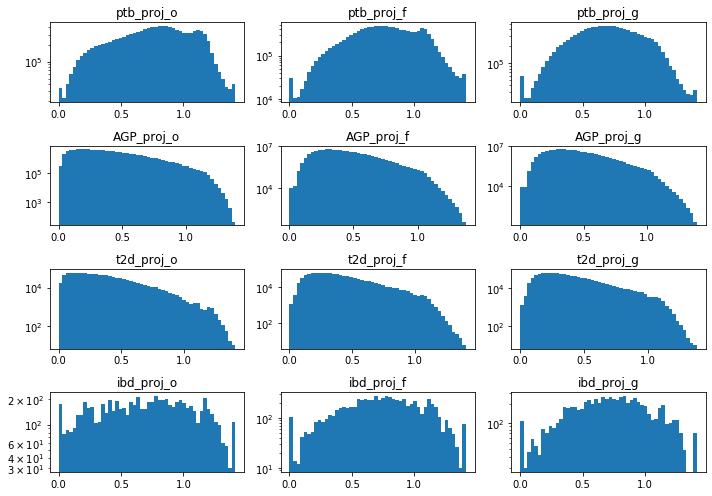

In [181]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,7))
for i,dataset_name in enumerate(['ptb', 'AGP', 't2d', 'ibd']):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name])
        p = label2path[label]
        data = np.genfromtxt(p, delimiter=';')
        pdists = pairwise_distances(data).flatten()
        axes[i,j].hist(pdists, bins=50)
        axes[i,j].set_title(label)
        axes[i,j].set_yscale('log')

plt.tight_layout()
plt.show()

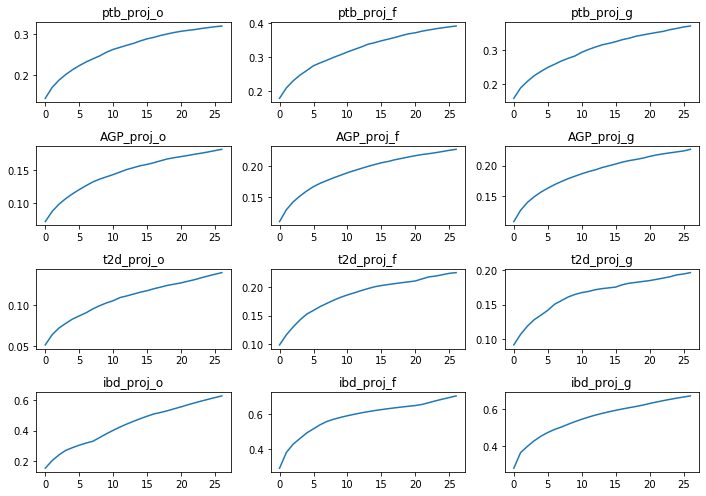

In [197]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,7))
for i,dataset_name in enumerate(['ptb', 'AGP', 't2d', 'ibd']):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name])
        p = label2path[label]
        data = np.genfromtxt(p, delimiter=';')
        p95_list = get_neigh_perc(data)
        axes[i,j].plot(p95_list)
        axes[i,j].set_title(label)
        LABEL2DBSCAN_PARAMS[label] = [min(p95_list), max(p95_list)]
plt.tight_layout()
plt.show()

# Distances LLE

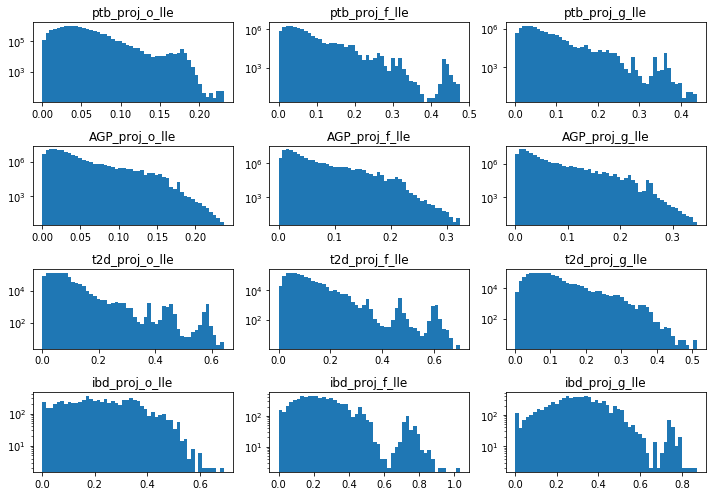

In [122]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,7))
for i,dataset_name in enumerate(['ptb', 'AGP', 't2d', 'ibd']):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'lle'])
        p = label2path[label]
        data = np.genfromtxt(p, delimiter=';')
        pdists = pairwise_distances(data).flatten()
        axes[i,j].hist(pdists, bins=50)
        axes[i,j].set_title(label)
        axes[i,j].set_yscale('log')
        
plt.tight_layout()
plt.show()

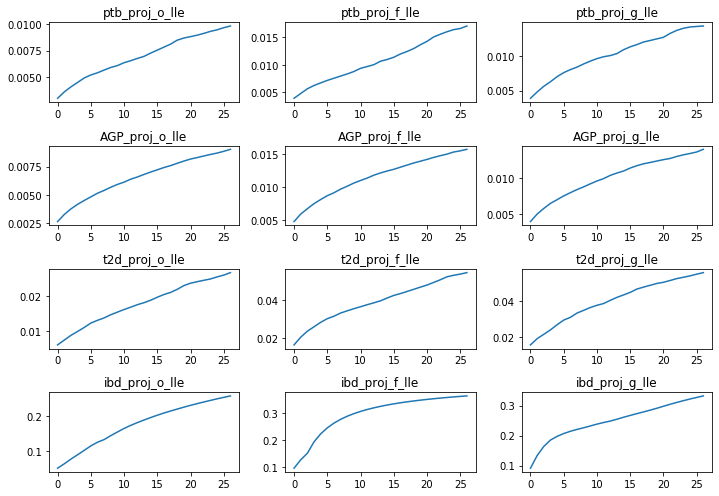

In [198]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,7))
for i,dataset_name in enumerate(['ptb', 'AGP', 't2d', 'ibd']):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'lle'])
        p = label2path[label]
        data = np.genfromtxt(p, delimiter=';')
        p95_list = get_neigh_perc(data)
        axes[i,j].plot(p95_list)
        axes[i,j].set_title(label)
        LABEL2DBSCAN_PARAMS[label] = [min(p95_list), max(p95_list)]
plt.tight_layout()
plt.show()

# Distances Isomap

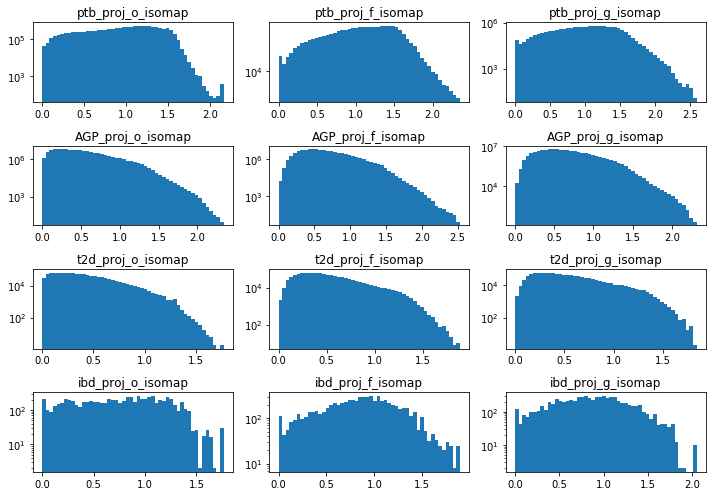

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,7))
for i,dataset_name in enumerate(['ptb', 'AGP', 't2d', 'ibd']):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'isomap'])
        p = label2path[label]
        data = np.genfromtxt(p, delimiter=';')
        pdists = pairwise_distances(data).flatten()
        axes[i,j].hist(pdists, bins=50)
        axes[i,j].set_title(label)
        axes[i,j].set_yscale('log')
        
plt.tight_layout()
plt.show()

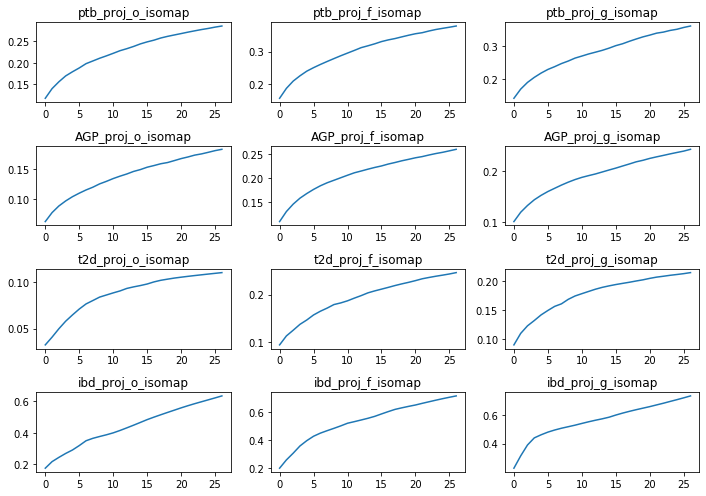

In [200]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,7))
for i,dataset_name in enumerate(['ptb', 'AGP', 't2d', 'ibd']):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'isomap'])
        p = label2path[label]
        data = np.genfromtxt(p, delimiter=';')
        p95_list = get_neigh_perc(data)
        axes[i,j].plot(p95_list)
        axes[i,j].set_title(label)
        LABEL2DBSCAN_PARAMS[label] = [min(p95_list), max(p95_list)]
plt.tight_layout()
plt.show()

# Functions

In [201]:
# Davies Bouldin Index
def DB_index(X, clusters_centers, labels):
    if -1 in labels:
        X = X[labels != -1]
        labels = labels[labels != -1]
    n_clusters = len(clusters_centers)
    d = np.array([distance.euclidean(X[i], clusters_centers[labels[i]]) for i in range(len(X))])
    mean_dist = np.zeros(n_clusters)
    for i in range(n_clusters):
        mean_dist[i] = d[labels == i].mean()
    return sum([max([(mean_dist[i] + mean_dist[j]) / distance.euclidean(clusters_centers[i], clusters_centers[j]) 
         for i in range(n_clusters) if i != j]) for j in range(n_clusters)]) / n_clusters

In [202]:
# Clusters centers
def cl_centers(X, pred, n_cl=None):
    if n_cl is None:
        n_cl = len(set(pred))
        if -1 in pred:
            n_cl -= 1
    centers = np.zeros((n_cl, X.shape[1]))
    for i in range(n_cl):
        centers[i] = X[pred == i].mean(0)
    return centers

In [203]:
# sample the data via binomial mask
def sample_data(data, fraction):
    mask = np.random.binomial(1, fraction, data.shape[0]).astype(bool)
    return data[mask]

In [204]:
def plot_proj_clustering(clustering_results, method='', suptitle=None):
    results = copy(clustering_results)
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
    for i,dataset_name in enumerate(['ptb', 'AGP', 't2d', 'ibd']):
        for j,tax_name in enumerate(['o', 'f', 'g']):
            label = f'{dataset_name}_proj_{tax_name}'
            
            if len(method) > 0:
                label += '_' + method
            
            names = results.keys() # clustering_results = {}
            
            if label in names:
                data = results[label]
                if len(data) > 0:
                    df = pd.DataFrame(data=data).T
                    df.columns = ['Davies-Bouldin index', 'silhouette_score', 'noise_ratio']
                    df.sort_index(ascending=False, inplace=True)
                    if df['noise_ratio'].sum() == 0.:
                        df.drop('noise_ratio', axis=1, inplace=True)
                    ax = axes[i,j]
                    ax.set_xlabel('# estimated clusters')
                    ax.set_title(label)
                    df.plot.bar(ax=ax)
    
    plt.tight_layout()
    if suptitle is not None:
        fig.suptitle(suptitle, fontsize=16, color='blue')
    plt.show()

In [210]:
def clustering(paths, method_class, param_range, dbscan=False):
    # performing clustering
    cluster_results = defaultdict(dict)
    for path in tqdm_notebook(paths):
        dataset = np.genfromtxt(path, delimiter=';')
        label = path.split("/")[-1].split(".")[0]
        
        if dbscan:
            print(f'Using external params: {LABEL2DBSCAN_PARAMS[label]}')
            min_eps, max_eps = LABEL2DBSCAN_PARAMS[label]
            param_range = np.linspace(min_eps*0.5, max_eps*1.5, len(param_range))
        
        for p in param_range:
            method = method_class(p)
            pred = method.fit_predict(dataset)
            if max(pred) > 0: # at least 2 clusters: [0,1]
                centers = cl_centers(dataset, pred)
                ind = davies_bouldin_score(dataset, pred)
                silh = silhouette_score(dataset, pred)
                n = len(np.unique(pred[pred != -1]))
                noise_ratio = sum(pred == -1)/len(pred)
                cluster_results[label][n] = [ind, silh, noise_ratio]
            else:
                print(f'Only one cluster was found for {label}, method: {method.__class__.__name__} param: {p}')
    return cluster_results

In [211]:
def create_clustering_pivot_table(results_list, methods_names, datasets_names, manifold='', noise_threshold=0.3):
    all_results = dict(zip(methods_names, results_list))
    X_dbind =np.zeros((len(methods_names), len(datasets_names)))
    X_silh =np.zeros((len(methods_names), len(datasets_names)))

    for i,(method_name) in tqdm_notebook(enumerate(methods_names)): # dbscan, kmeans
        for j,(dataset_name) in enumerate(datasets_names):
            
            method_results_dict = all_results[method_name] # e.g. dbscan results
            names = method_results_dict.keys() # datasets names
            label = dataset_name 
            if len(manifold) > 0:
                label += '_' + manifold
            results_dict = method_results_dict[label]
            if len(results_dict) == 0:
                n_dbind = 1
                n_silh = 1
            else:
                # filtering noise samples
                results_dict = {k:v for k,v in results_dict.items() if v[-1] < noise_threshold}
                if len(results_dict) > 0:
                    n_dbind = sorted(results_dict, key=lambda x: results_dict[x][0])[0] # minimized
                    n_silh = sorted(results_dict, key=lambda x: results_dict[x][1])[-1] # maximized
                else:
                    print(f'{method_name} couldnt estimate N clusters for {label} given threshold: {noise_threshold}')
                    n_dbind = np.nan
                    n_silh = np.nan
            
            X_dbind[i,j] = n_dbind
            X_silh[i,j] = n_silh
    X_dbind = pd.DataFrame(data = X_dbind, columns=datasets_names, index=methods_names)
    X_silh = pd.DataFrame(data = X_silh, columns=datasets_names, index=methods_names)
    return X_dbind, X_silh

# PCA clustering

In [213]:
methods_dict_PCA = {'dbscan':[DBSCAN, np.linspace(0.0001, 0.7, 25)],
                   'KMeans':[KMeans, np.arange(2, 15, 1)],
                   'SpectralClustering':[SpectralClustering, np.arange(2, 15, 1)]} 

dbscan_results = clustering(paths_pca, *methods_dict_PCA['dbscan'], dbscan=True)

# kmeans_results = clustering(paths_pca, *methods_dict_PCA['KMeans'])

# spectral_results = clustering(paths_pca, *methods_dict_PCA['SpectralClustering'])

Using external params: [0.17874351446137382, 0.39249722900703893]
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.42228781475060123
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.44309506834559587
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.4639023219405905
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.4847095755355852
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.5055168291305798
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.5263240827255744
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.5471313363205691
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.5679385899155638
Only one cluster was found for ptb_proj_f, method: DBSCAN param: 0.5887458435105584
Using external params: [0.07289615947402783, 0.18048863256446412]
Only one cluster was found for AGP_proj_o, method: DBSCAN param: 0.2219236011155124
Only one cluster was found

Only one cluster was found for AGP_proj_f, method: DBSCAN param: 0.3404538678698097
Using external params: [0.10919294242310401, 0.22629525051516808]
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.2563626744424021
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.2682312746324521
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.2800998748225021
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.2919684750125521
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.3038370752026021
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.31570567539265215
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.32757427558270213
Only one cluster was found for AGP_proj_g, method: DBSCAN param: 0.3394428757727521
Using external params: [0.290588107211667, 0.7052674244127479]
Only one cluster was found for ibd_proj_f, method: DBSCAN param: 0.33542052923360194
Only one cluster was found f

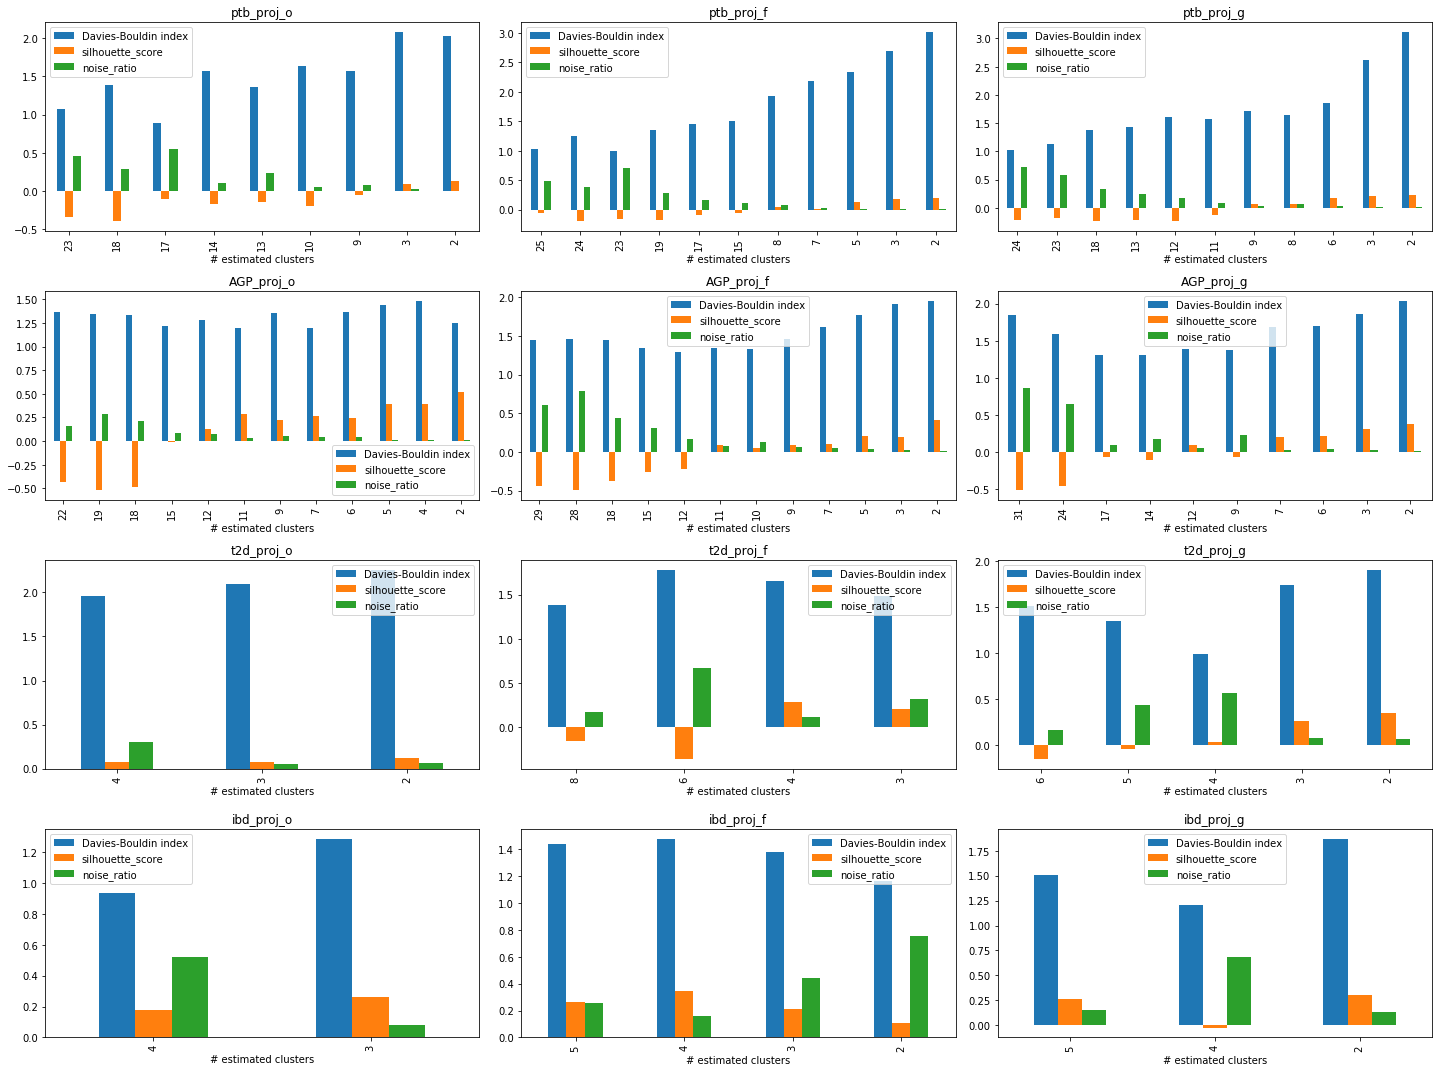

In [214]:
plot_proj_clustering(dbscan_results)

# DBSCAN: PCA

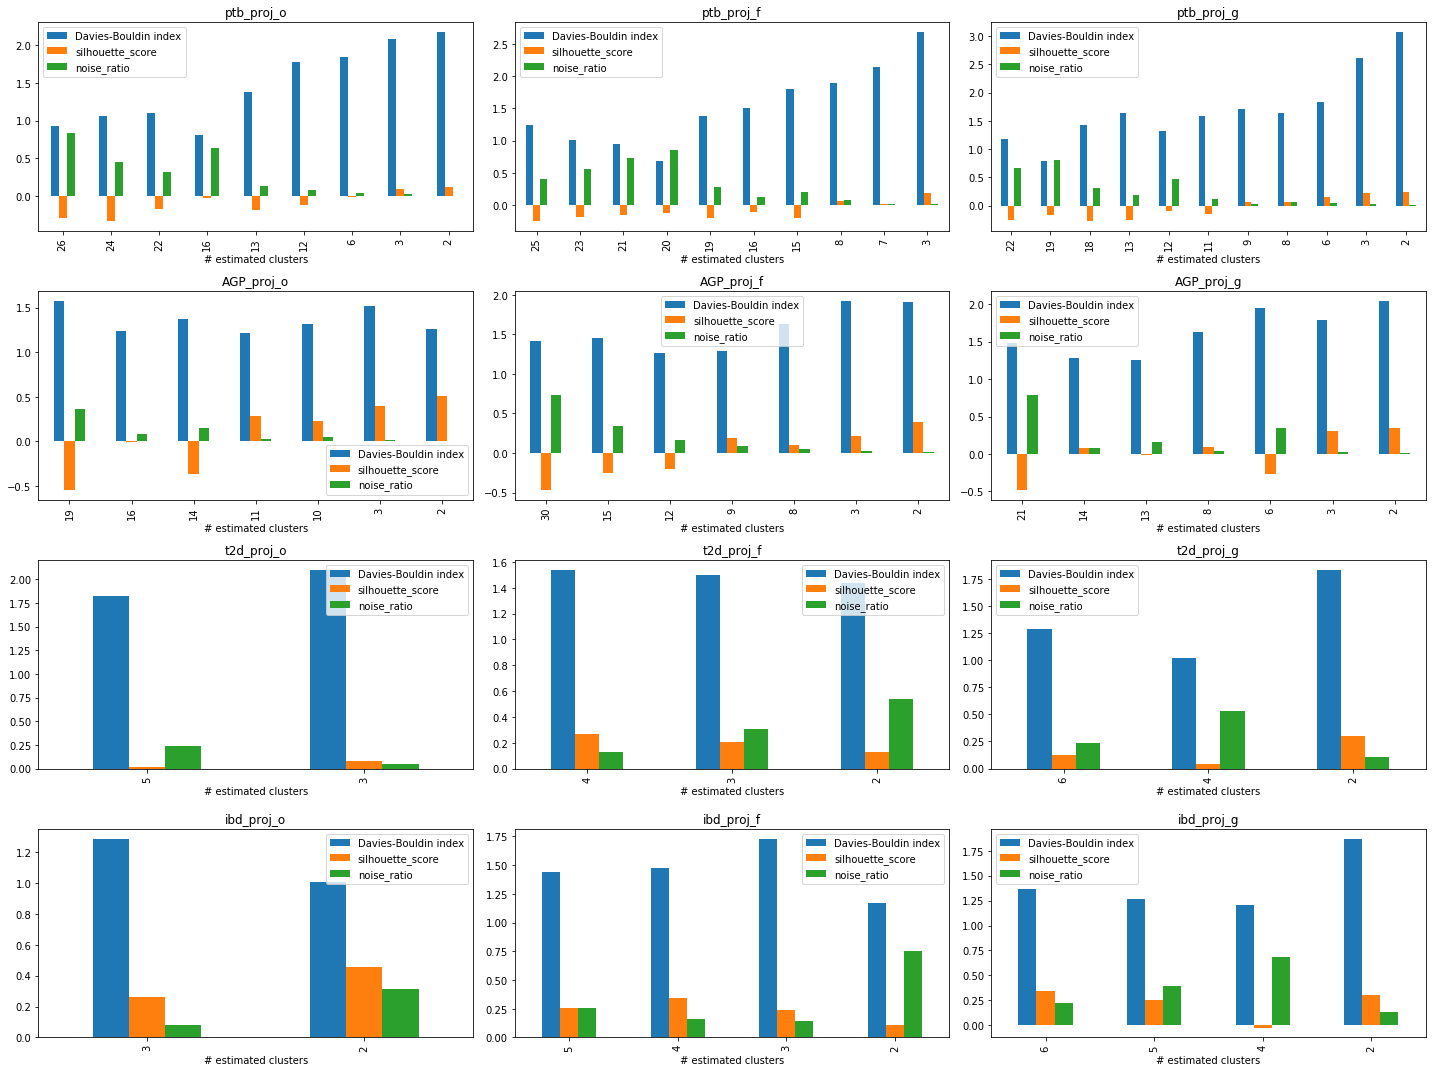

In [40]:
plot_proj_clustering(dbscan_results)

# KMEANS: PCA

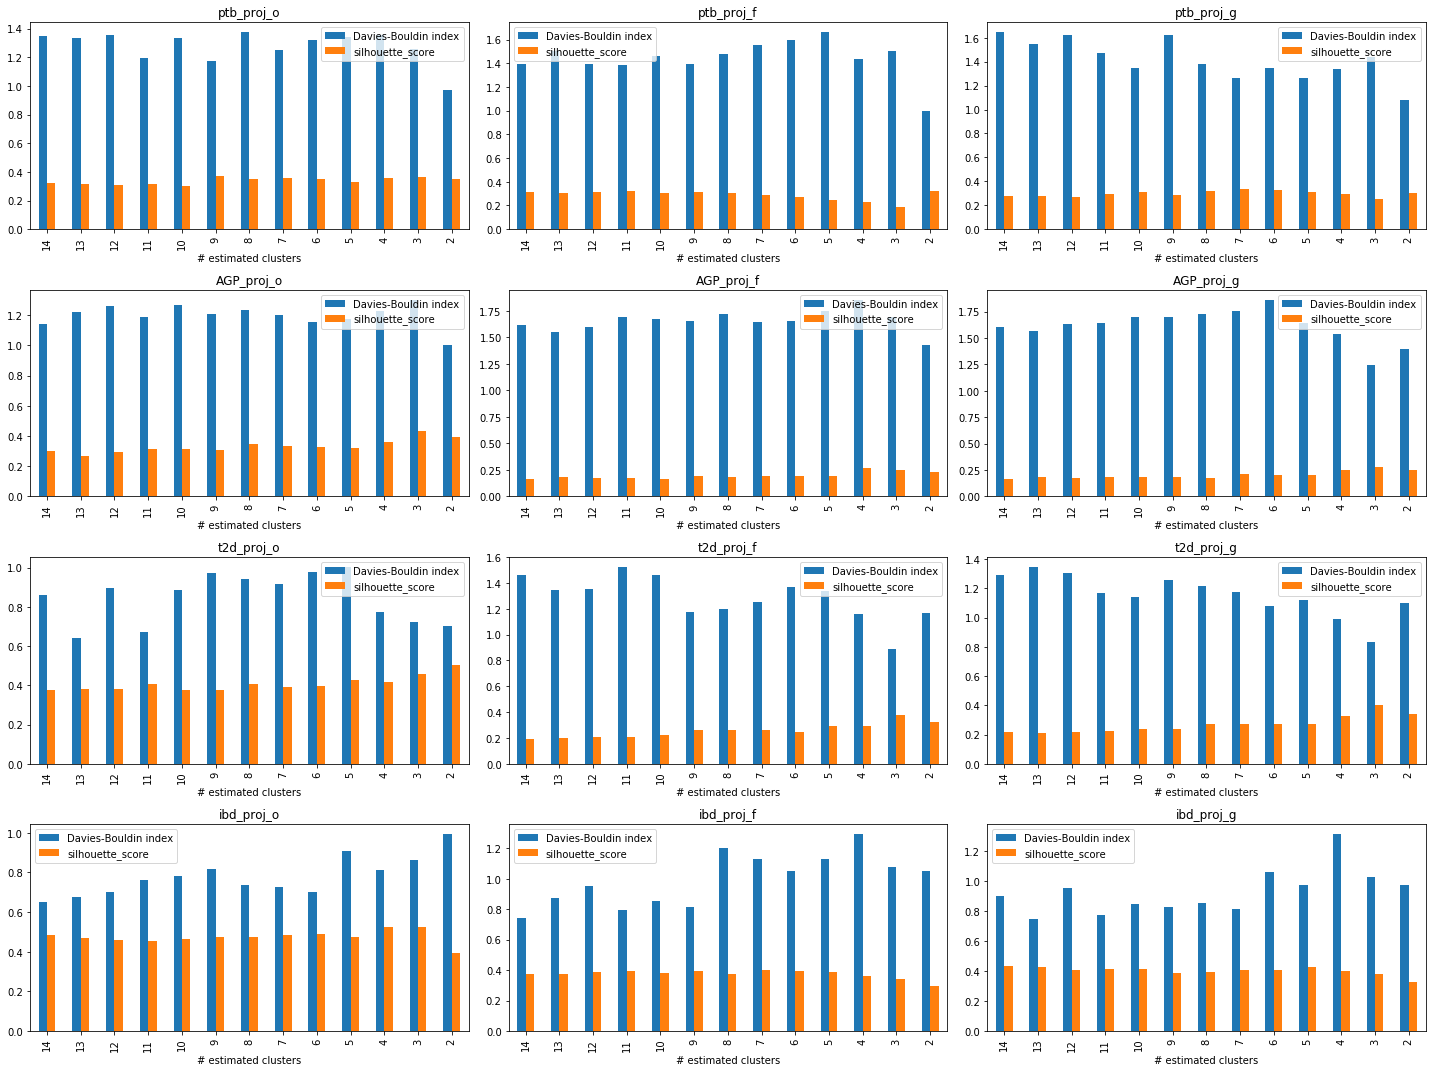

In [19]:
plot_proj_clustering(kmeans_results)

# SPECTRAL: PCA

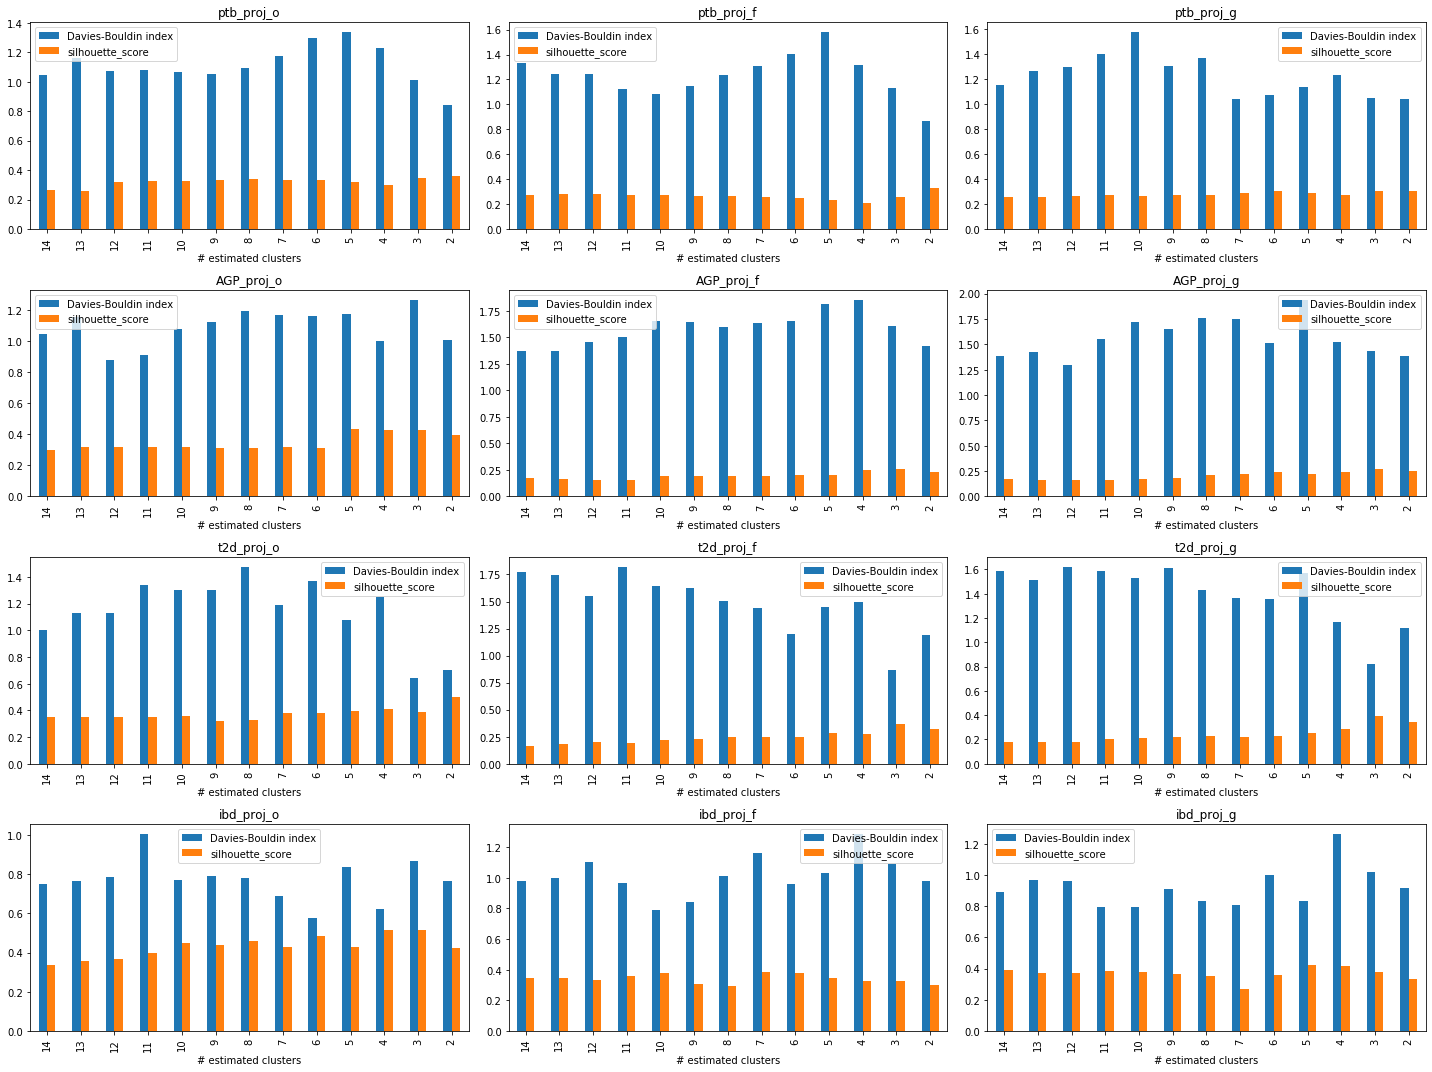

In [20]:
plot_proj_clustering(spectral_results)


# Aggregation

In [84]:
methods_names = list(methods_dict_PCA.keys())
datasets_names = sorted(list(dbscan_results.keys()))

X_dbind, X_silh = create_clustering_pivot_table([dbscan_results, kmeans_results, spectral_results], methods_names, datasets_names)

In [85]:
X_silh

AGP_proj_f  AGP_proj_g  AGP_proj_o  ibd_proj_f  \
dbscan                     2.0         2.0         2.0         4.0   
KMeans                     4.0         3.0         3.0         7.0   
SpectralClustering         3.0         3.0         5.0         7.0   

                    ibd_proj_g  ibd_proj_o  ptb_proj_f  ptb_proj_g  \
dbscan                     6.0         3.0         3.0         2.0   
KMeans                    14.0         4.0        11.0         7.0   
SpectralClustering         5.0         3.0         2.0         3.0   

                    ptb_proj_o  t2d_proj_f  t2d_proj_g  t2d_proj_o  
dbscan                     2.0         4.0         2.0         3.0  
KMeans                     9.0         3.0         3.0         2.0  
SpectralClustering         2.0         3.0         3.0         2.0

# For ISOMAP

In [215]:
methods_dict_ISOMAP = {'dbscan':[DBSCAN, np.linspace(0.0001, 1., 25)]} 

# ,
#                        'KMeans':[KMeans, np.arange(2, 15, 1)],
#                       'SpectralClustering':[SpectralClustering, np.arange(2, 15, 1)]

methods_names = list(methods_dict_ISOMAP.keys())

isomap_cluster_results_list = []
for method_name in methods_names:
    method_class, param_range = methods_dict_ISOMAP[method_name]
    cluster_results = clustering(paths_mf_isomap, method_class, param_range, dbscan=method_name=='dbscan')
    isomap_cluster_results_list.append(cluster_results)

Using external params: [0.06216356168160195, 0.18329950869141348]
Only one cluster was found for AGP_proj_o_isomap, method: DBSCAN param: 0.2444658277625803
Only one cluster was found for AGP_proj_o_isomap, method: DBSCAN param: 0.2546269728540936
Only one cluster was found for AGP_proj_o_isomap, method: DBSCAN param: 0.26478811794560686
Only one cluster was found for AGP_proj_o_isomap, method: DBSCAN param: 0.2749492630371202
Using external params: [0.14050246314361894, 0.3608945703228672]
Only one cluster was found for ptb_proj_g_isomap, method: DBSCAN param: 0.44319797550253176
Only one cluster was found for ptb_proj_g_isomap, method: DBSCAN param: 0.4628267514988856
Only one cluster was found for ptb_proj_g_isomap, method: DBSCAN param: 0.4824555274952394
Only one cluster was found for ptb_proj_g_isomap, method: DBSCAN param: 0.5020843034915932
Only one cluster was found for ptb_proj_g_isomap, method: DBSCAN param: 0.521713079487947
Only one cluster was found for ptb_proj_g_isomap,

Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.181452709997767
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.19489644906652143
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.20834018813527586
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.22178392720403028
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.23522766627278474
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.24867140534153917
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.2621151444102936
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.27555888347904806
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.28900262254780246
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.3024463616165569
Only one cluster was found for t2d_proj_f_isomap, method: DBSCAN param: 0.3158901006

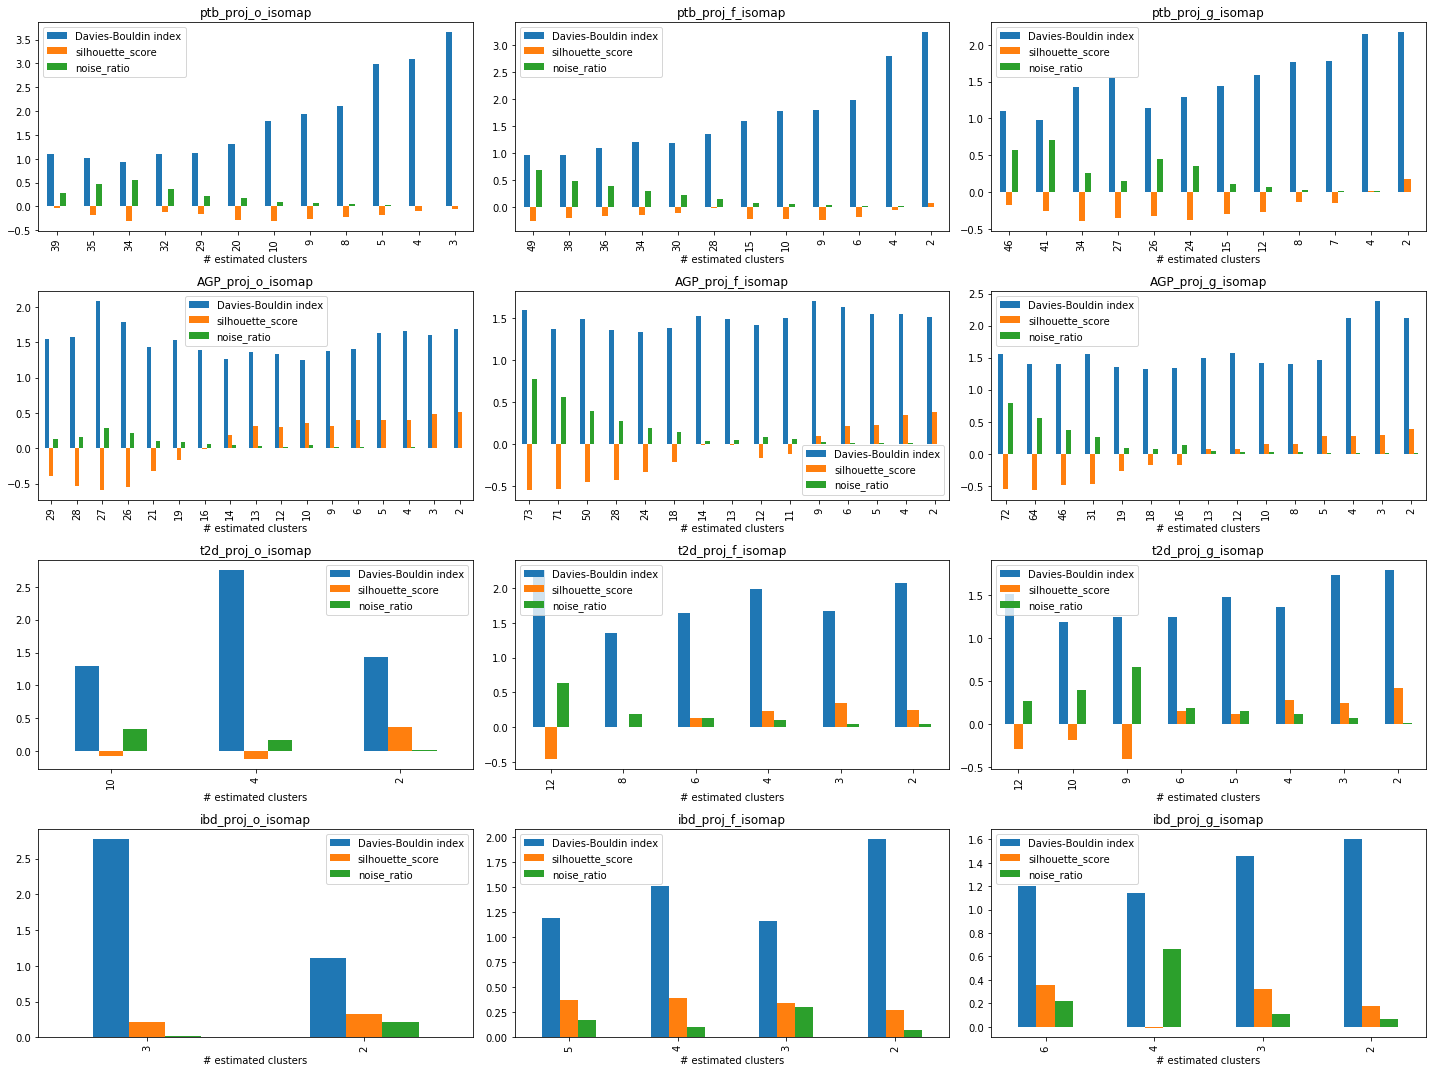

In [216]:
plot_proj_clustering(isomap_cluster_results_list[0], 'isomap')

# DBSCAN: ISOMAP

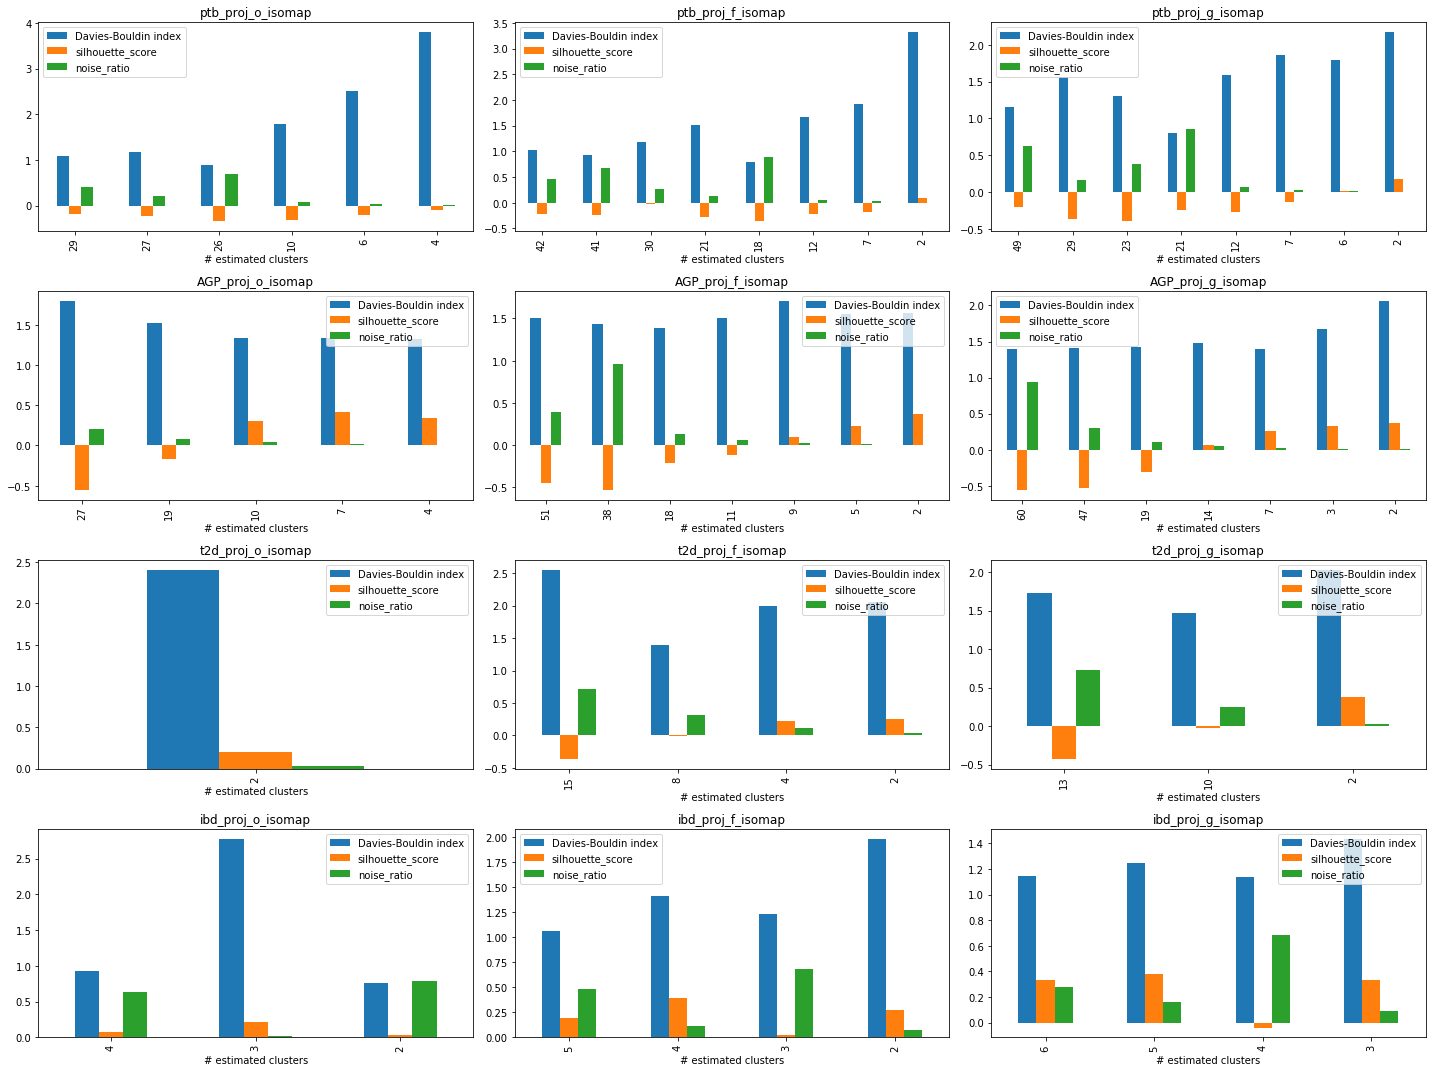

In [26]:
plot_proj_clustering(isomap_cluster_results_list[0], 'isomap')

# KMEANS: ISOMAP

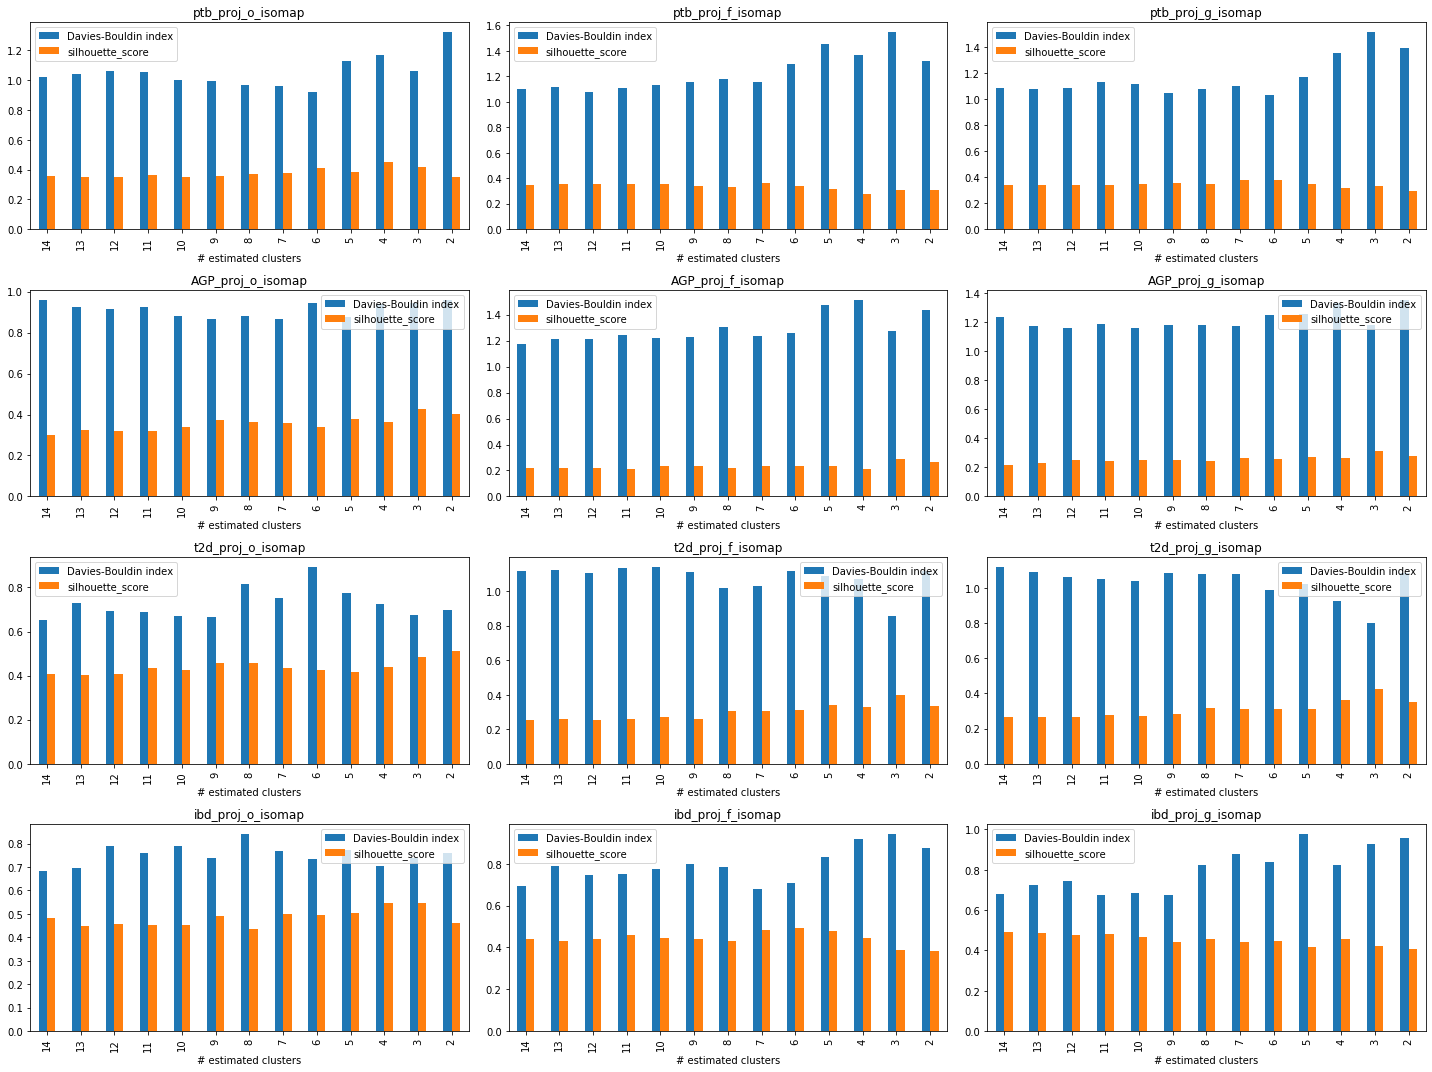

In [27]:
plot_proj_clustering(isomap_cluster_results_list[1], 'isomap')

# SPECTRAL: ISOMAP

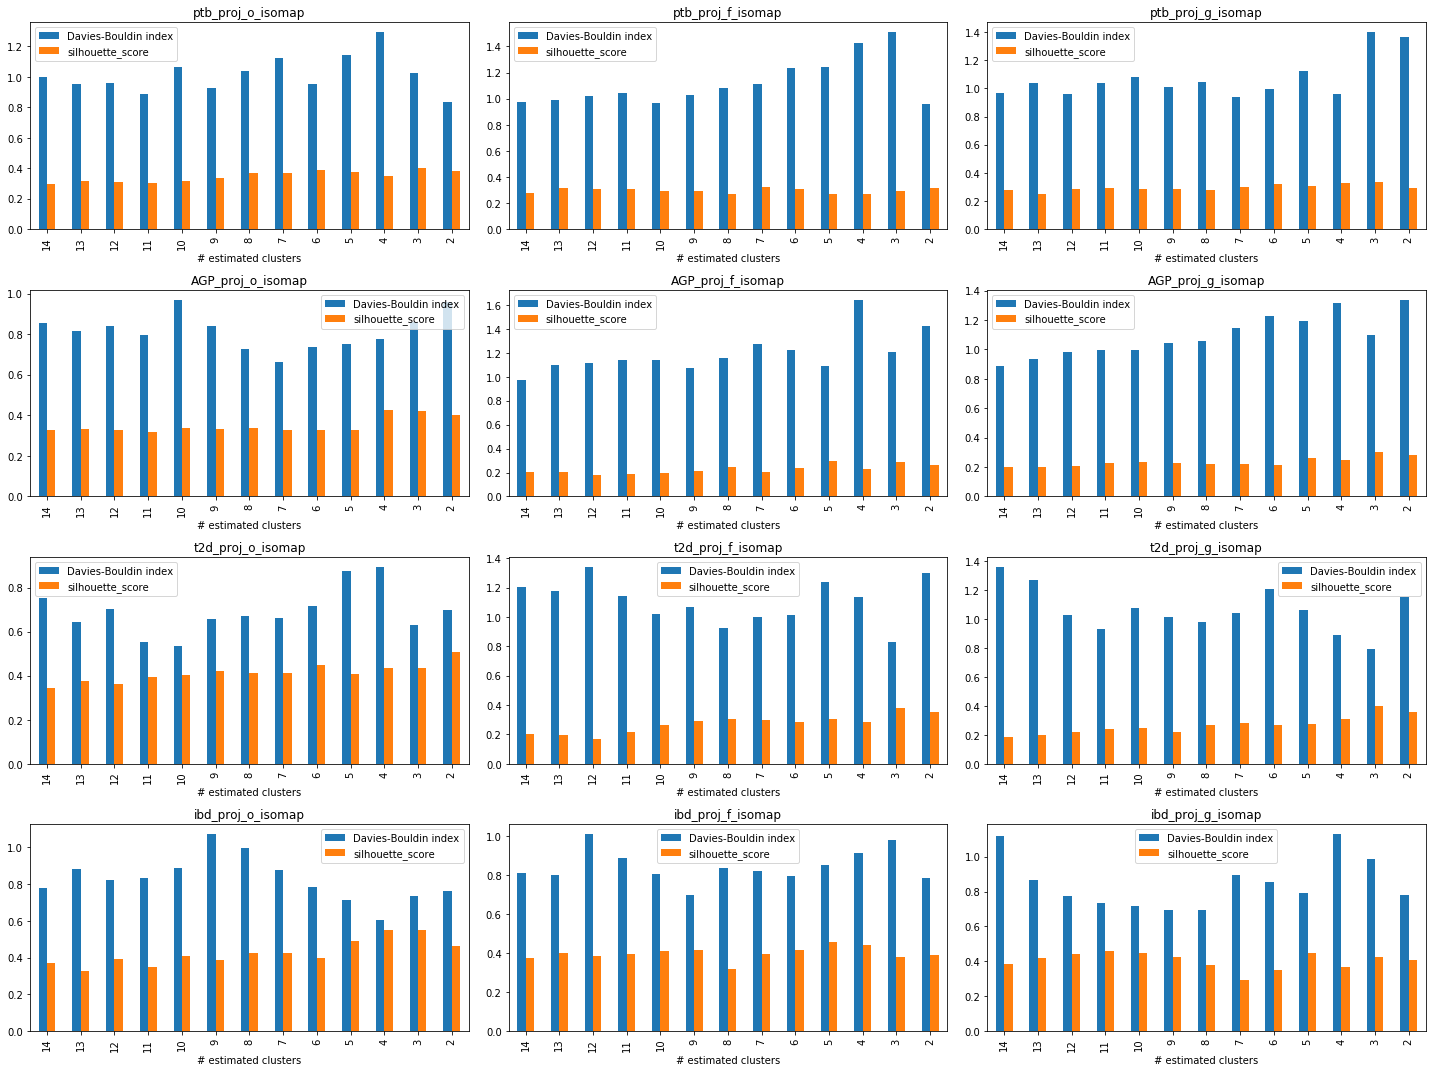

In [28]:
plot_proj_clustering(isomap_cluster_results_list[2], 'isomap')

In [86]:
X_dbind_isomap, X_silh_isomap = create_clustering_pivot_table(copy(isomap_cluster_results_list), methods_names, datasets_names, manifold='isomap', noise_threshold=0.5)

In [87]:
X_dbind_isomap

AGP_proj_f  AGP_proj_g  AGP_proj_o  ibd_proj_f  \
dbscan                    18.0         7.0         4.0         5.0   
KMeans                    14.0        12.0         7.0         7.0   
SpectralClustering        14.0        14.0         7.0         9.0   

                    ibd_proj_g  ibd_proj_o  ptb_proj_f  ptb_proj_g  \
dbscan                     6.0         3.0        42.0        23.0   
KMeans                     9.0        14.0        12.0         6.0   
SpectralClustering         9.0         4.0         2.0         7.0   

                    ptb_proj_o  t2d_proj_f  t2d_proj_g  t2d_proj_o  
dbscan                    29.0         8.0        10.0         2.0  
KMeans                     6.0         3.0         3.0        14.0  
SpectralClustering         2.0         3.0         3.0        10.0

In [88]:
X_silh_isomap

AGP_proj_f  AGP_proj_g  AGP_proj_o  ibd_proj_f  \
dbscan                     2.0         2.0         7.0         4.0   
KMeans                     3.0         3.0         3.0         6.0   
SpectralClustering         5.0         3.0         4.0         5.0   

                    ibd_proj_g  ibd_proj_o  ptb_proj_f  ptb_proj_g  \
dbscan                     5.0         3.0         2.0         2.0   
KMeans                    14.0         3.0         7.0         6.0   
SpectralClustering        11.0         3.0         7.0         3.0   

                    ptb_proj_o  t2d_proj_f  t2d_proj_g  t2d_proj_o  
dbscan                     4.0         2.0         2.0         2.0  
KMeans                     4.0         3.0         3.0         2.0  
SpectralClustering         3.0         3.0         3.0         2.0

# LLE

In [ ]:
methods_dict_LLE = {'dbscan':[DBSCAN, np.linspace(0.0001, 0.4, 200)]}
#                    'KMeans':[KMeans, np.arange(2, 15, 1)],
#                    'SpectralClustering':[SpectralClustering, np.arange(2, 15, 1)]}

methods_names = list(methods_dict_LLE.keys())

lle_cluster_results_list = []
for method_name in methods_names:
    method_class, param_range = methods_dict_LLE[method_name]
    cluster_results = clustering(paths_mf_lle, method_class, param_range, dbscan=method_name=='dbscan')
    lle_cluster_results_list.append(cluster_results)

Using external params: [0.006056319942370755, 0.02660430721347876]
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.015073836127904621
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.015259154222623379
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.015444472317342136
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.015629790412060893
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.01581510850677965
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.01600042660149841
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.01618574469621717
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.016371062790935927
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.016556380885654684
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.01674169898037344
Only one cluster was found for t2d_pr

Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03212310084203032
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03230841893674907
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03249373703146784
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.032679055126186594
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03286437322090535
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03304969131562411
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03323500941034287
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.033420327505061624
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03360564559978038
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.03379096369449914
Only one cluster was found for t2d_proj_o_lle, method: DBSCAN param: 0.033976281789217896
Only one cluster w

Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.40299124461371266
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.40526714723100515
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.40754304984829764
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.40981895246559014
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.41209485508288257
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.41437075770017506
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.41664666031746755
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.41892256293476
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.4211984655520525
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.423474368169345
Only one cluster was found for ibd_proj_g_lle, method: DBSCAN param: 0.4257502707866374
Only one cluster was found f

Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.27906456714834743
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.28158161713409385
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.2840986671198403
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.2866157171055867
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.2891327670913331
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.29164981707707954
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.29416686706282597
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.2966839170485724
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.2992009670343188
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.30171801702006523
Only one cluster was found for ibd_proj_f_lle, method: DBSCAN param: 0.30423506700581165
Only one cluster was found

Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.02075832692170938
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.02087755678445066
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.02099678664719194
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.02111601650993322
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.0212352463726745
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.02135447623541578
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.02147370609815706
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.021592935960898344
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.021712165823639624
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.021831395686380903
Only one cluster was found for ptb_proj_f_lle, method: DBSCAN param: 0.021950625549122187
Only one cluster w

Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06433721275438008
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06470400986286852
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06507080697135696
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06543760407984539
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06580440118833383
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06617119829682228
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.0665379954053107
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06690479251379915
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06727158962228759
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06763838673077602
Only one cluster was found for t2d_proj_f_lle, method: DBSCAN param: 0.06800518383926446
Only one cluster was f

Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.06878458451380762
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.06916777038709733
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.06955095626038703
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.06993414213367673
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.07031732800696643
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.07070051388025612
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.07108369975354582
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.07146688562683552
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.07185007150012522
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.07223325737341492
Only one cluster was found for t2d_proj_g_lle, method: DBSCAN param: 0.07261644324670463
Only one cluster was 

Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.3433263696828758
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.34513343102274197
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.34694049236260815
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.34874755370247434
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.35055461504234053
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.3523616763822067
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.3541687377220729
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.3559757990619391
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.35778286040180535
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.35958992174167154
Only one cluster was found for ibd_proj_o_lle, method: DBSCAN param: 0.3613969830815377
Only one cluster was found

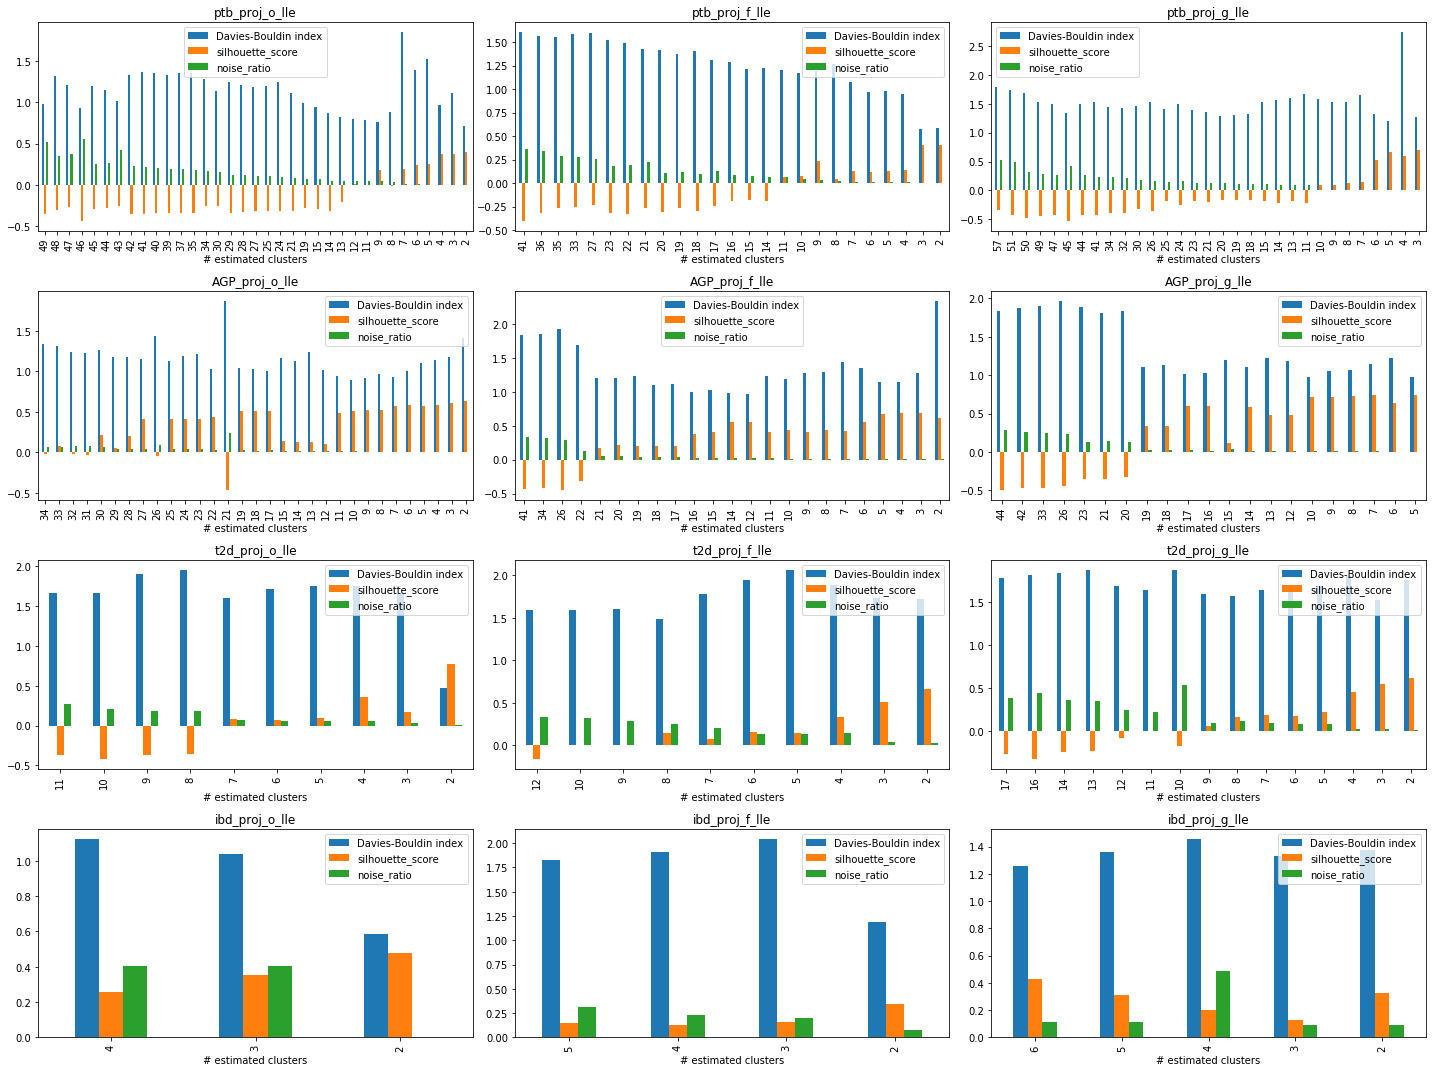

In [219]:
plot_proj_clustering(lle_cluster_results_list[0], 'lle')

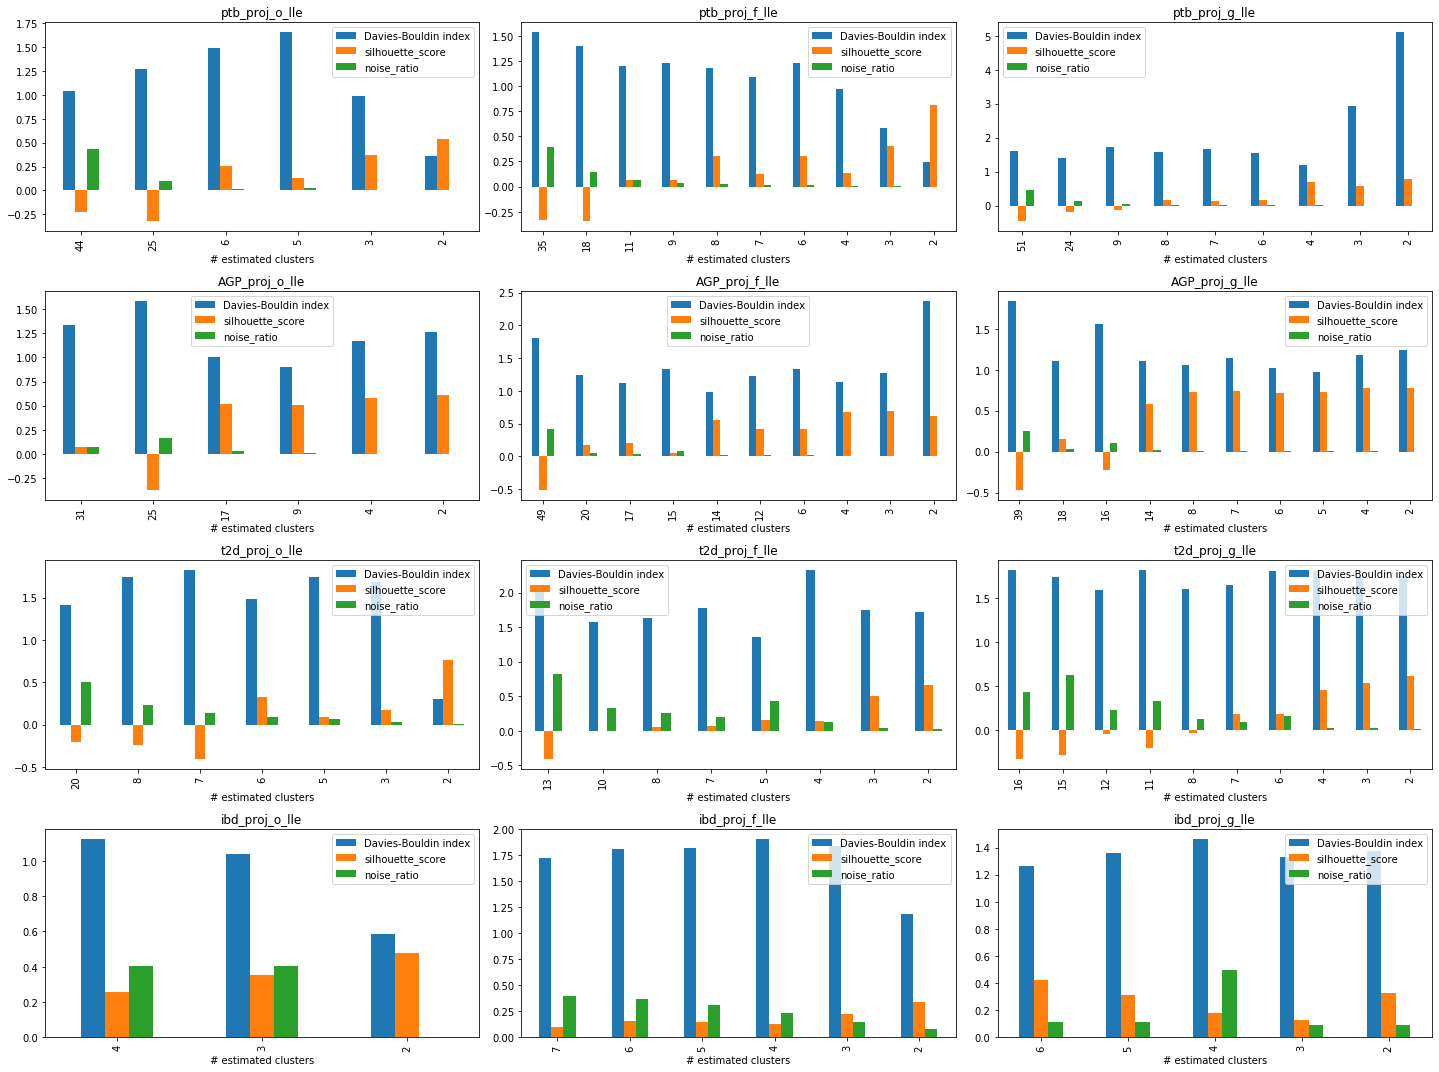

In [137]:
plot_proj_clustering(lle_cluster_results_list[0], 'lle')

In [135]:
# lle_cluster_results_list[0]['t2d_proj_o_lle']

In [136]:
# lle_cluster_results_list[0]['AGP_proj_o_lle']

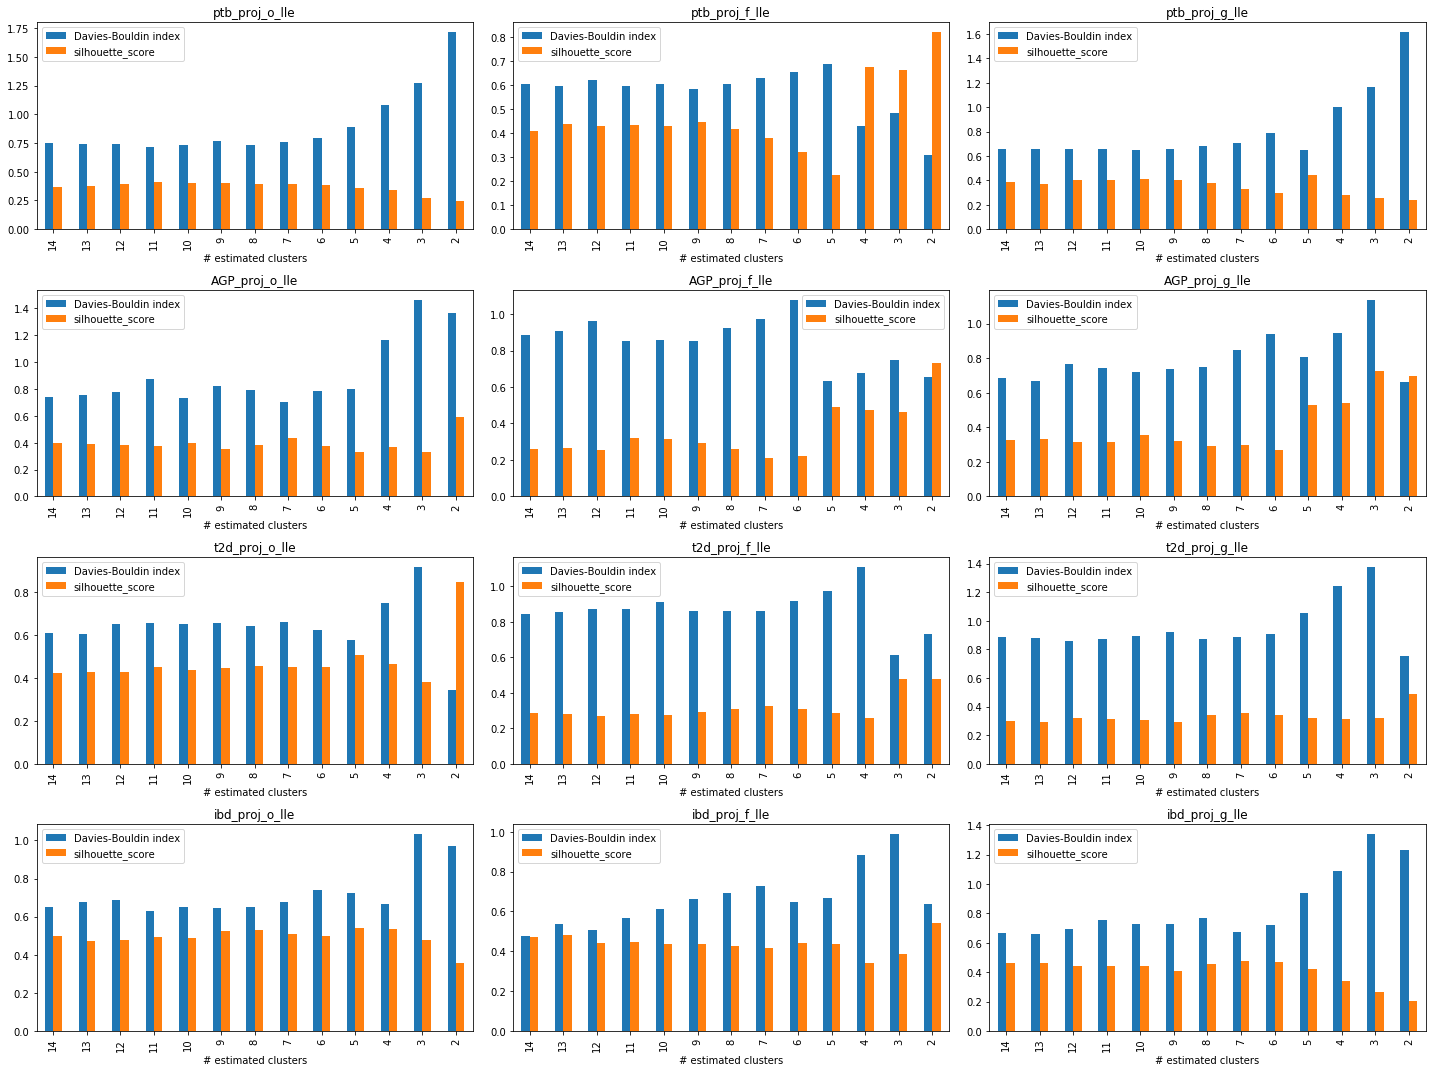

In [34]:
plot_proj_clustering(lle_cluster_results_list[1], 'lle')

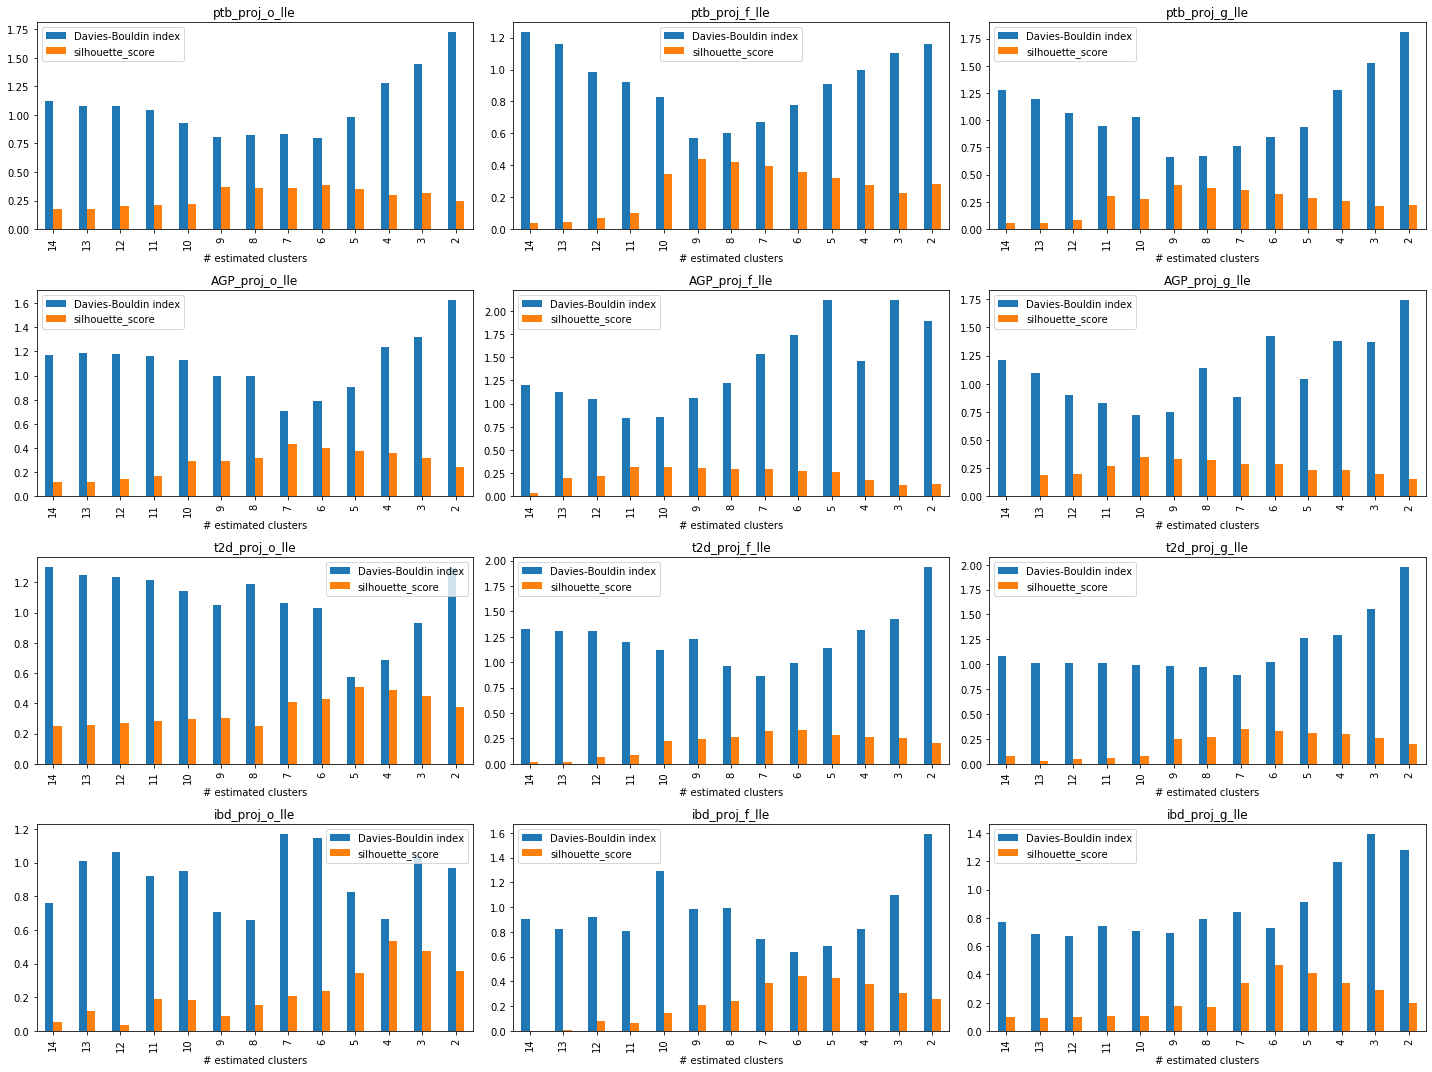

In [101]:
plot_proj_clustering(lle_cluster_results_list[2], 'lle')

In [89]:
X_dbind_lle, X_silh_lle = create_clustering_pivot_table(lle_cluster_results_list, methods_names, datasets_names, manifold='lle')

In [90]:
X_dbind_lle

AGP_proj_f  AGP_proj_g  AGP_proj_o  ibd_proj_f  \
dbscan                     6.0         6.0         1.0         2.0   
KMeans                     5.0         2.0         7.0        14.0   
SpectralClustering        11.0        10.0         7.0         6.0   

                    ibd_proj_g  ibd_proj_o  ptb_proj_f  ptb_proj_g  \
dbscan                     3.0         2.0         2.0         4.0   
KMeans                    13.0        11.0         2.0         5.0   
SpectralClustering        12.0         8.0         9.0         9.0   

                    ptb_proj_o  t2d_proj_f  t2d_proj_g  t2d_proj_o  
dbscan                     2.0         6.0         2.0         1.0  
KMeans                    11.0         3.0         2.0         2.0  
SpectralClustering         6.0         7.0         7.0         5.0

In [91]:
X_silh_lle

AGP_proj_f  AGP_proj_g  AGP_proj_o  ibd_proj_f  \
dbscan                     6.0         6.0         1.0         2.0   
KMeans                     2.0         3.0         2.0         2.0   
SpectralClustering        11.0        10.0         7.0         6.0   

                    ibd_proj_g  ibd_proj_o  ptb_proj_f  ptb_proj_g  \
dbscan                     5.0         2.0         2.0         2.0   
KMeans                     7.0         5.0         2.0         5.0   
SpectralClustering         6.0         4.0         9.0         9.0   

                    ptb_proj_o  t2d_proj_f  t2d_proj_g  t2d_proj_o  
dbscan                     2.0         2.0         2.0         1.0  
KMeans                    11.0         3.0         2.0         2.0  
SpectralClustering         6.0         6.0         7.0         5.0

# Aggregated pivot tables: DBIND

In [92]:
X_dbind_lle.index = [i + '_lle' for i in X_dbind_lle.index]
X_dbind_isomap.index = [i + '_isomap' for i in X_dbind_isomap.index]

In [93]:
X_dbind_all = pd.concat([X_dbind, X_dbind_lle, X_dbind_isomap], axis = 0)
X_dbind_all

AGP_proj_f  AGP_proj_g  AGP_proj_o  ibd_proj_f  \
dbscan                           12.0        13.0        11.0         5.0   
KMeans                            2.0         3.0         2.0        14.0   
SpectralClustering               13.0        12.0        12.0        10.0   
dbscan_lle                        6.0         6.0         1.0         2.0   
KMeans_lle                        5.0         2.0         7.0        14.0   
SpectralClustering_lle           11.0        10.0         7.0         6.0   
dbscan_isomap                    18.0         7.0         4.0         5.0   
KMeans_isomap                    14.0        12.0         7.0         7.0   
SpectralClustering_isomap        14.0        14.0         7.0         9.0   

                           ibd_proj_g  ibd_proj_o  ptb_proj_f  ptb_proj_g  \
dbscan                            6.0         3.0        19.0        11.0   
KMeans                           13.0        14.0         2.0         2.0   
SpectralClustering               10.0         6.0         2.0         7.0   
dbscan_lle                        3.0         2.0         2.0         4.0   
KMeans_lle                       13.0        11.0         2.0         5.0   
SpectralClustering_lle           12.0         8.0         9.0         9.0   
dbscan_isomap                     6.0         3.0        42.0        23.0   
KMeans_isomap                     9.0        14.0        12.0         6.0   
SpectralClustering_isomap         9.0         4.0         2.0         7.0   

                           ptb_proj_o  t2d_proj_f  t2d_proj_g  t2d_proj_o  
dbscan                           13.0         4.0         6.0         5.0  
KMeans                            2.0         3.0         3.0        13.0  
SpectralClustering                2.0         3.0         3.0         3.0  
dbscan_lle                        2.0         6.0         2.0         1.0  
KMeans_lle                       11.0         3.0         2.0         2.0  
SpectralClustering_lle            6.0         7.0         7.0         5.0  
dbscan_isomap                    29.0         8.0        10.0         2.0  
KMeans_isomap                     6.0         3.0         3.0        14.0  
SpectralClustering_isomap         2.0         3.0         3.0        10.0

# Aggregated pivot tables: SILHOETTE

In [94]:
X_silh_lle.index = [i + '_lle' for i in X_silh_lle.index]
X_silh_isomap.index = [i + '_isomap' for i in X_silh_isomap.index]
X_silh_all = pd.concat([X_silh, X_silh_lle, X_silh_isomap], axis = 0)
X_silh_all

AGP_proj_f  AGP_proj_g  AGP_proj_o  ibd_proj_f  \
dbscan                            2.0         2.0         2.0         4.0   
KMeans                            4.0         3.0         3.0         7.0   
SpectralClustering                3.0         3.0         5.0         7.0   
dbscan_lle                        6.0         6.0         1.0         2.0   
KMeans_lle                        2.0         3.0         2.0         2.0   
SpectralClustering_lle           11.0        10.0         7.0         6.0   
dbscan_isomap                     2.0         2.0         7.0         4.0   
KMeans_isomap                     3.0         3.0         3.0         6.0   
SpectralClustering_isomap         5.0         3.0         4.0         5.0   

                           ibd_proj_g  ibd_proj_o  ptb_proj_f  ptb_proj_g  \
dbscan                            6.0         3.0         3.0         2.0   
KMeans                           14.0         4.0        11.0         7.0   
SpectralClustering                5.0         3.0         2.0         3.0   
dbscan_lle                        5.0         2.0         2.0         2.0   
KMeans_lle                        7.0         5.0         2.0         5.0   
SpectralClustering_lle            6.0         4.0         9.0         9.0   
dbscan_isomap                     5.0         3.0         2.0         2.0   
KMeans_isomap                    14.0         3.0         7.0         6.0   
SpectralClustering_isomap        11.0         3.0         7.0         3.0   

                           ptb_proj_o  t2d_proj_f  t2d_proj_g  t2d_proj_o  
dbscan                            2.0         4.0         2.0         3.0  
KMeans                            9.0         3.0         3.0         2.0  
SpectralClustering                2.0         3.0         3.0         2.0  
dbscan_lle                        2.0         2.0         2.0         1.0  
KMeans_lle                       11.0         3.0         2.0         2.0  
SpectralClustering_lle            6.0         6.0         7.0         5.0  
dbscan_isomap                     4.0         2.0         2.0         2.0  
KMeans_isomap                     4.0         3.0         3.0         2.0  
SpectralClustering_isomap         3.0         3.0         3.0         2.0

# Visualisation 2D PCA

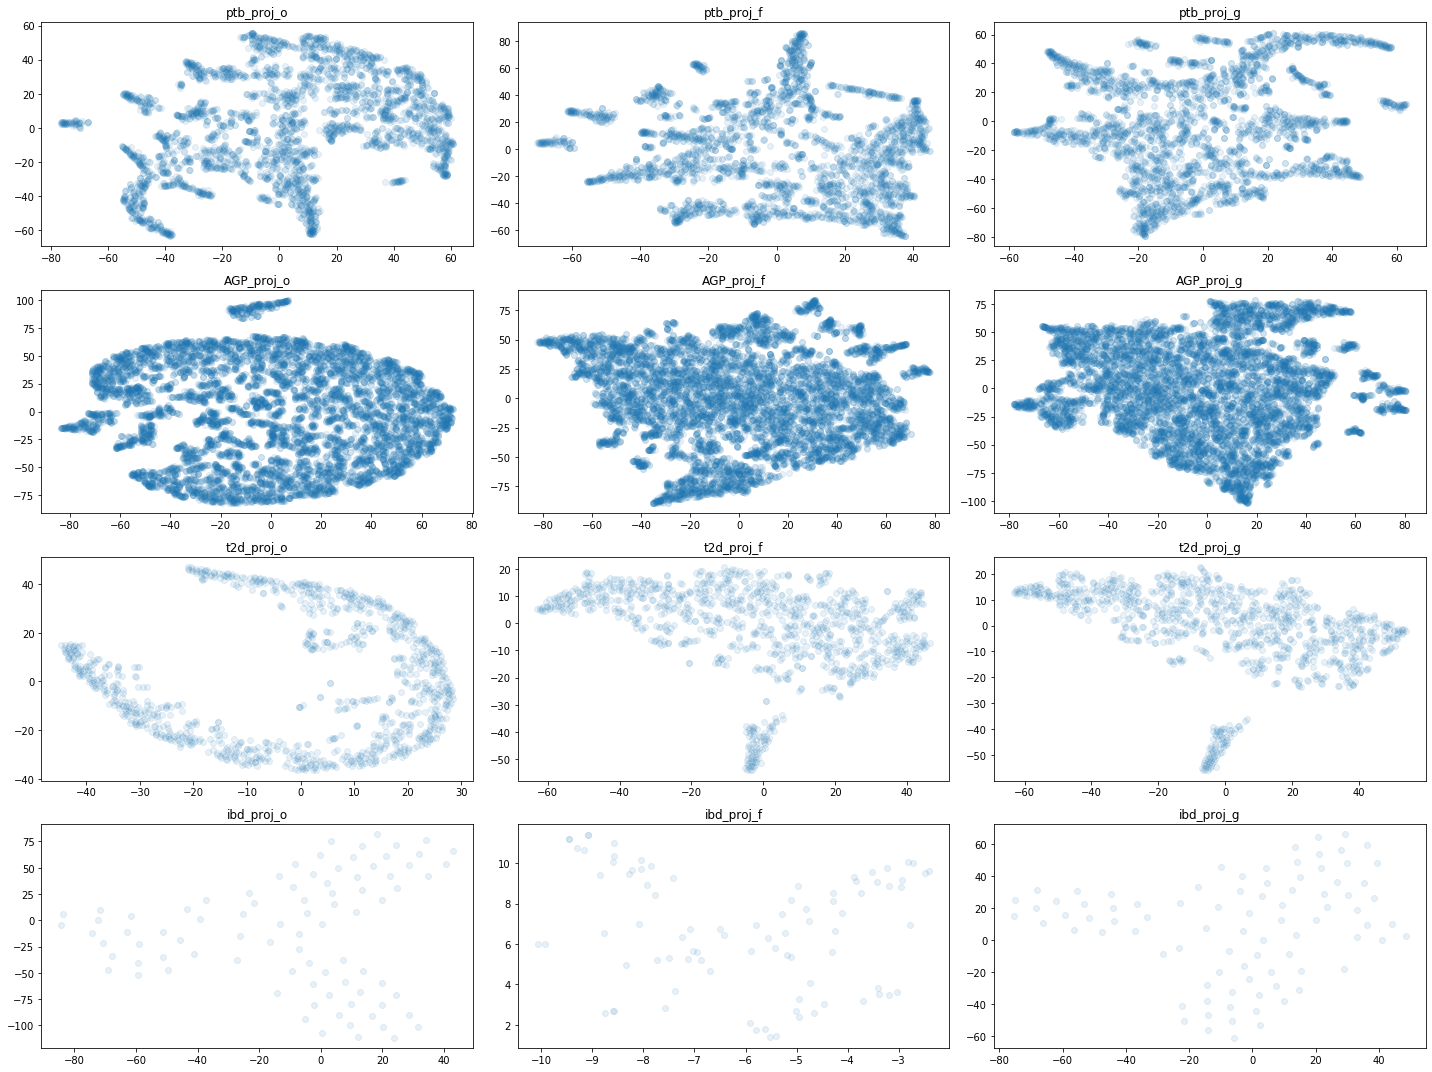

In [96]:
tsne2d_pca = {}
from sklearn.manifold import TSNE
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name])
        path = label2path[label]
        dataset = np.genfromtxt(path, delimiter=';')
        tsne2 = TSNE(2)
        tsne2.fit(dataset)
        tsne2d_pca[label] = tsne2.embedding_
        axes[i,j].scatter(tsne2.embedding_[:,0], tsne2.embedding_[:,1], alpha=0.1)
        axes[i,j].set_title(label)
plt.tight_layout()
plt.show()

# Visualisation 2D ISOMAP

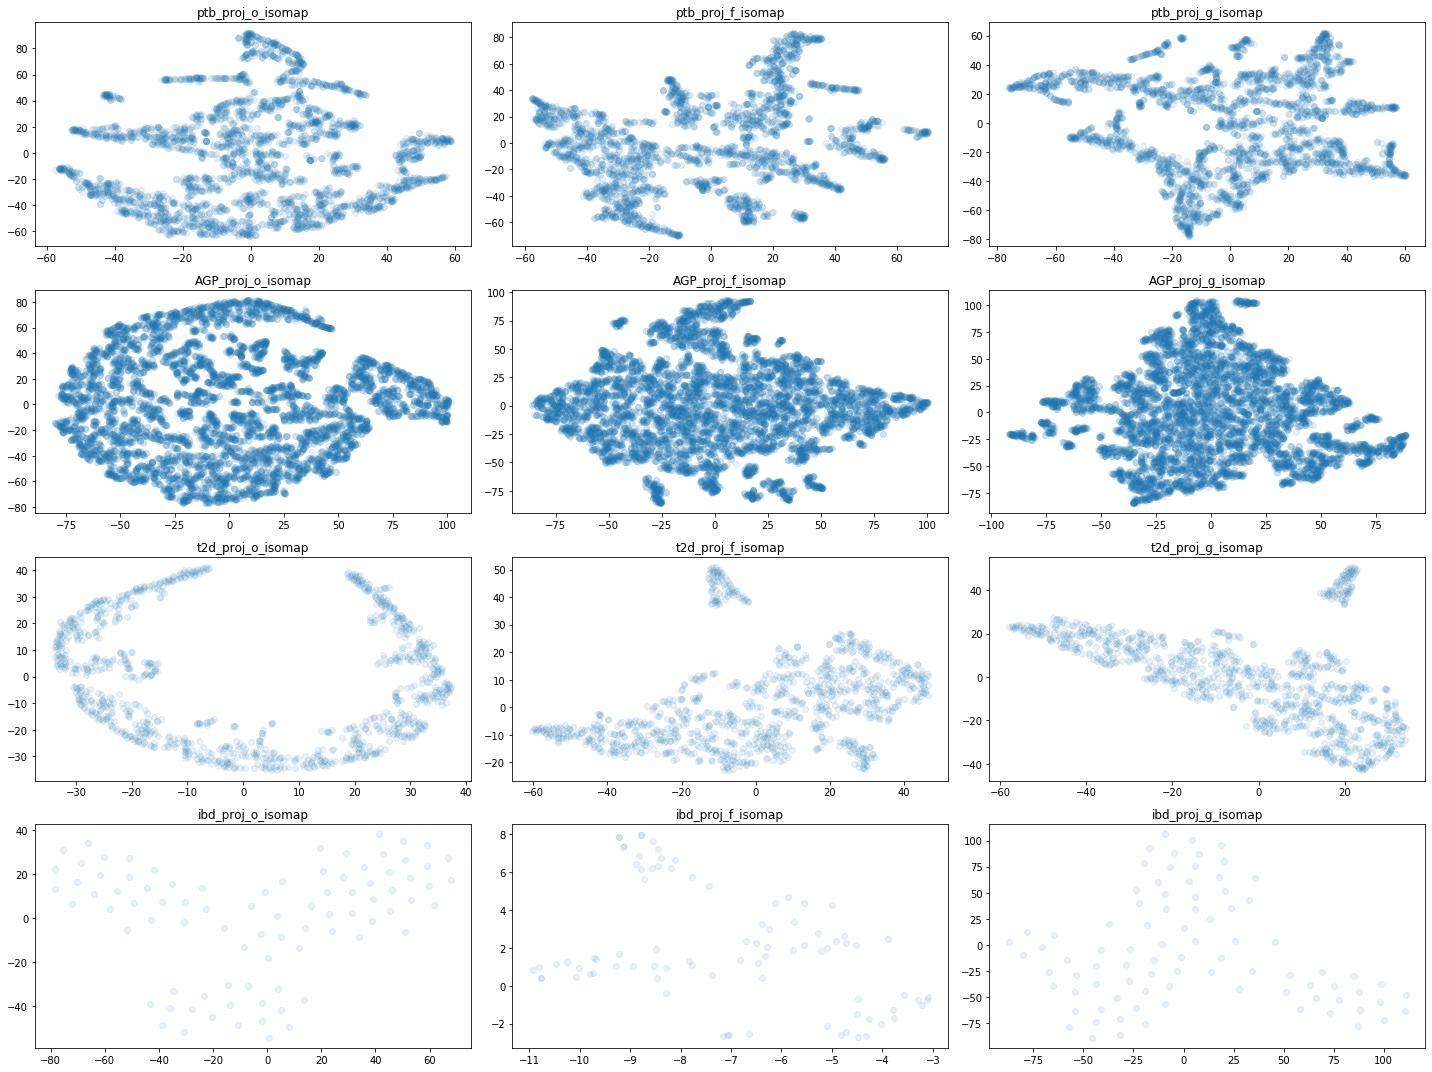

In [97]:
tsne2d_isomap = {}
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'isomap'])
        path = label2path[label]
        dataset = np.genfromtxt(path, delimiter=';')
        tsne2 = TSNE(2)
        tsne2.fit(dataset)
        tsne2d_isomap[label] = tsne2.embedding_
        axes[i,j].scatter(tsne2.embedding_[:,0], tsne2.embedding_[:,1], alpha=0.1)
        axes[i,j].set_title(label)
plt.tight_layout()
plt.show()

# Visualisation 2D LLE

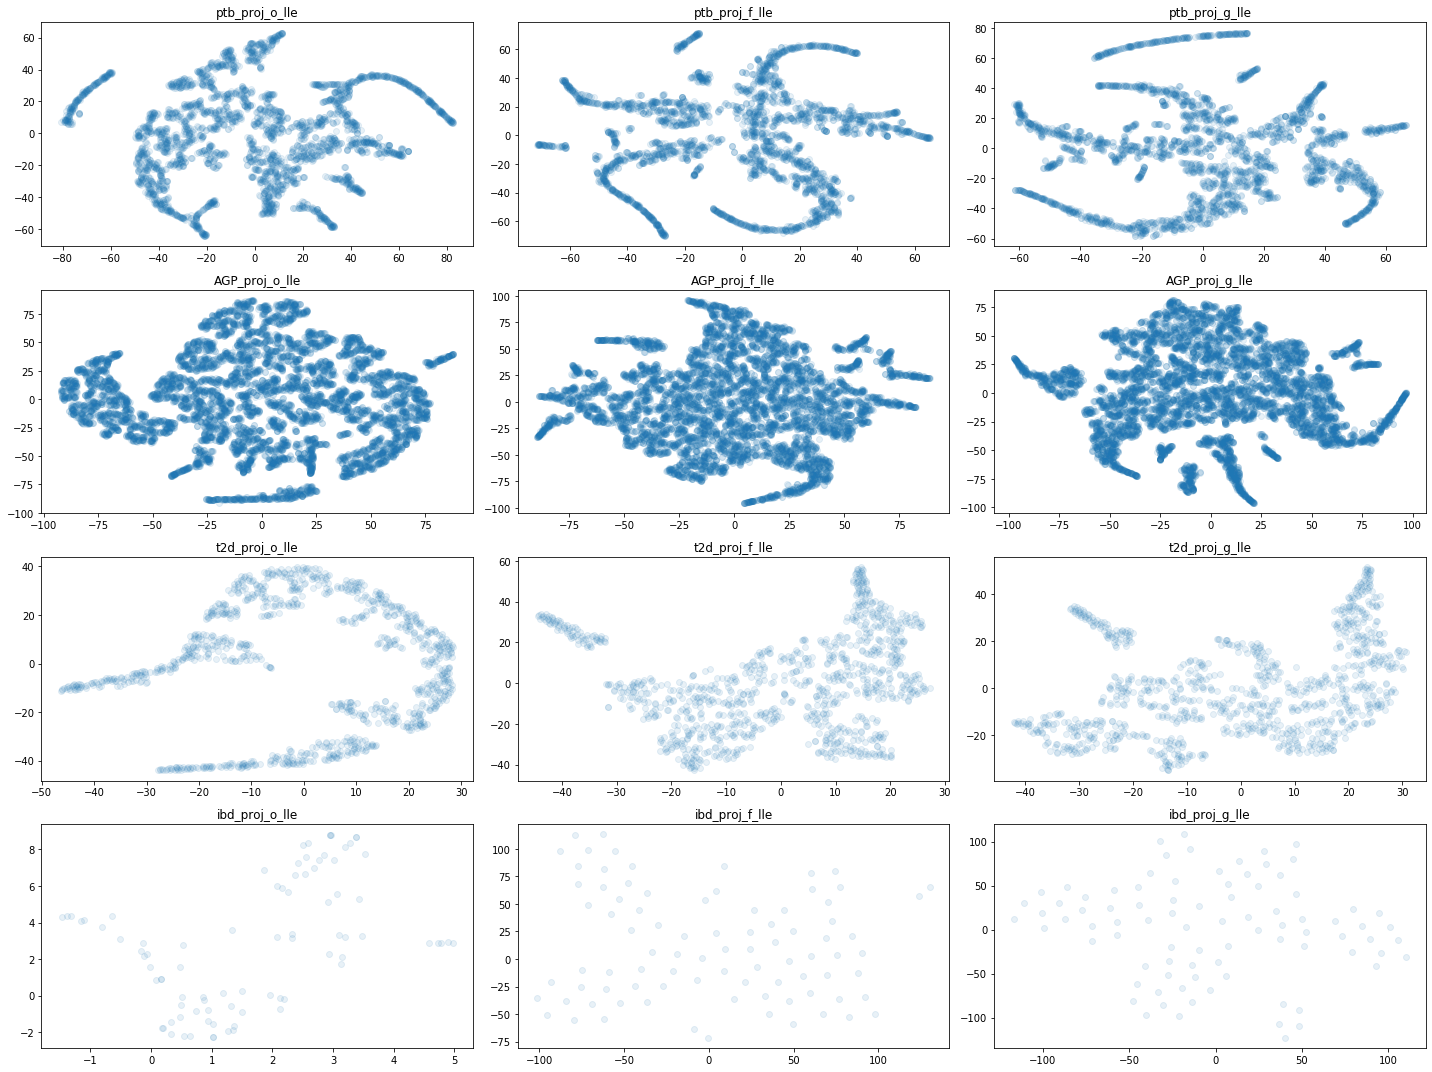

In [98]:
tsne2d_lle = {}
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,15))
for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'lle'])
        path = label2path[label]
        dataset = np.genfromtxt(path, delimiter=';')
        tsne2 = TSNE(2)
        tsne2.fit(dataset)
        tsne2d_lle[label] = tsne2.embedding_
        axes[i,j].scatter(tsne2.embedding_[:,0], tsne2.embedding_[:,1], alpha=0.1)
        axes[i,j].set_title(label)
plt.tight_layout()
plt.show()

# TSNE3D PCA

In [109]:
from mpl_toolkits.mplot3d import Axes3D 

In [110]:
# tsne3d_results = {}
# n_datasets = 4
# n_taxes = 3
# # fig = plt.figure(figsize=(25,20))
# for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
#     for j,tax_name in enumerate(['o', 'f', 'g']):
# #         ax = fig.add_subplot(n_datasets, n_taxes, i+j+1, projection='3d')
#         label = '_'.join([dataset_name, 'proj', tax_name])
#         path = label2path[label]
#         dataset = np.genfromtxt(path, delimiter=';')
#         tsne3 = TSNE(3)
#         tsne3.fit(dataset)
#         tsne3d_results[label] = tsne3.embedding_
# #         ax.scatter(tsne3.embedding_[:,0], tsne3.embedding_[:,1], tsne3.embedding_[:,2], marker='.', alpha=0.7)
# #         ax.set_title(label, fontsize=20)
# # plt.tight_layout()
# # plt.show()

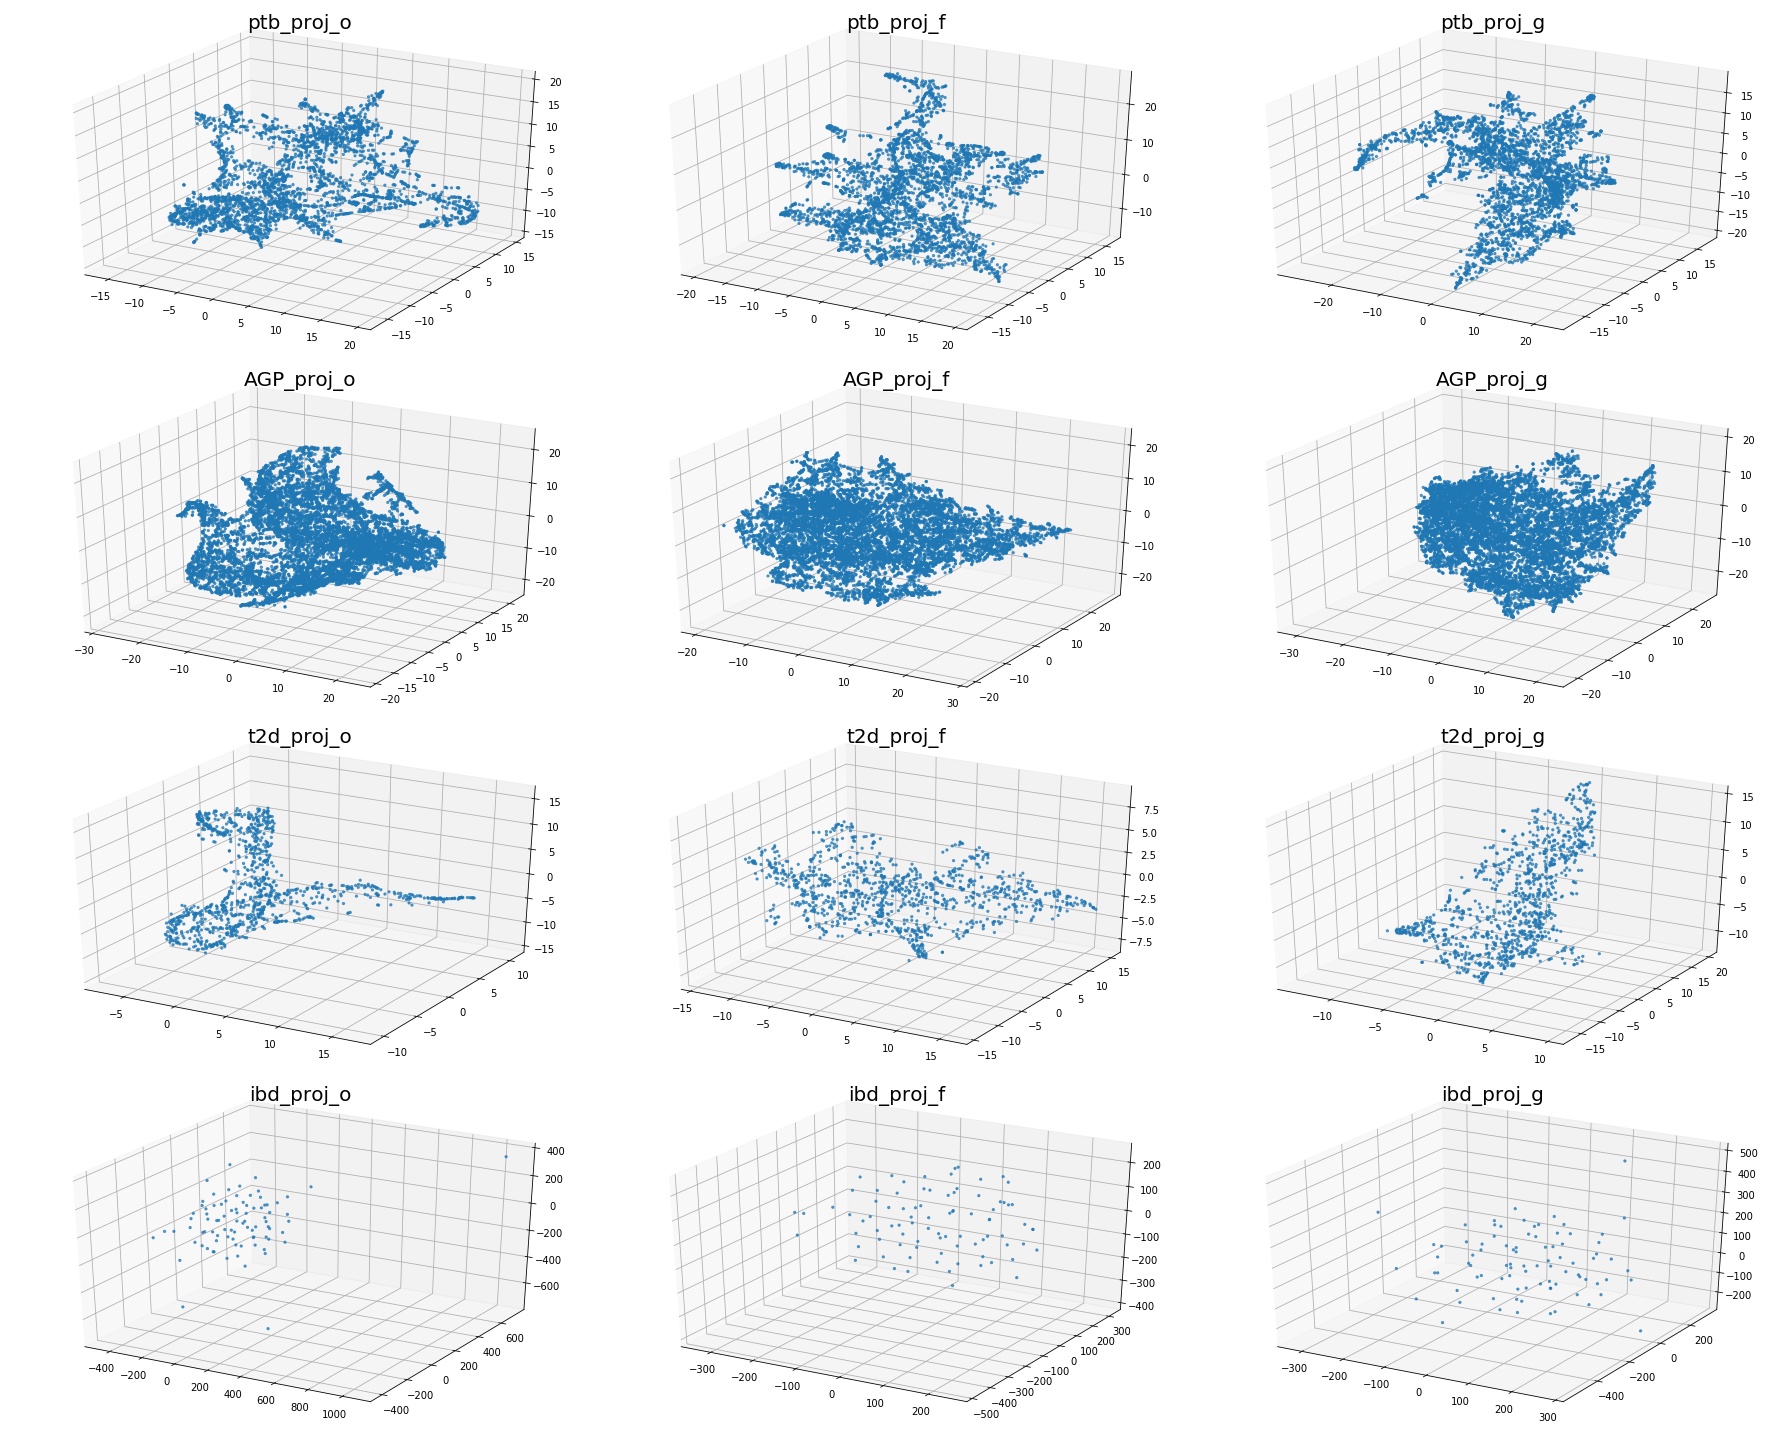

In [113]:
fig = plt.figure(figsize=(25,20))
for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name])
        embedding_ = tsne3d_results[label]
        
        ax = fig.add_subplot(4, 3, i*3+j+1, projection='3d')
        ax.scatter(embedding_[:,0], embedding_[:,1], embedding_[:,2], marker='.', alpha=0.7)
        ax.set_title(label, fontsize=20)
plt.tight_layout()
plt.show()

# TSNE3D ISOMAP

In [114]:
# tsne3d_results_isomap = {}
# for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
#     for j,tax_name in enumerate(['o', 'f', 'g']):
#         label = '_'.join([dataset_name, 'proj', tax_name, 'isomap'])
#         path = label2path[label]
#         dataset = np.genfromtxt(path, delimiter=';')
#         tsne3 = TSNE(3)
#         tsne3.fit(dataset) 
#         tsne3d_results_isomap[label] = tsne3.embedding_

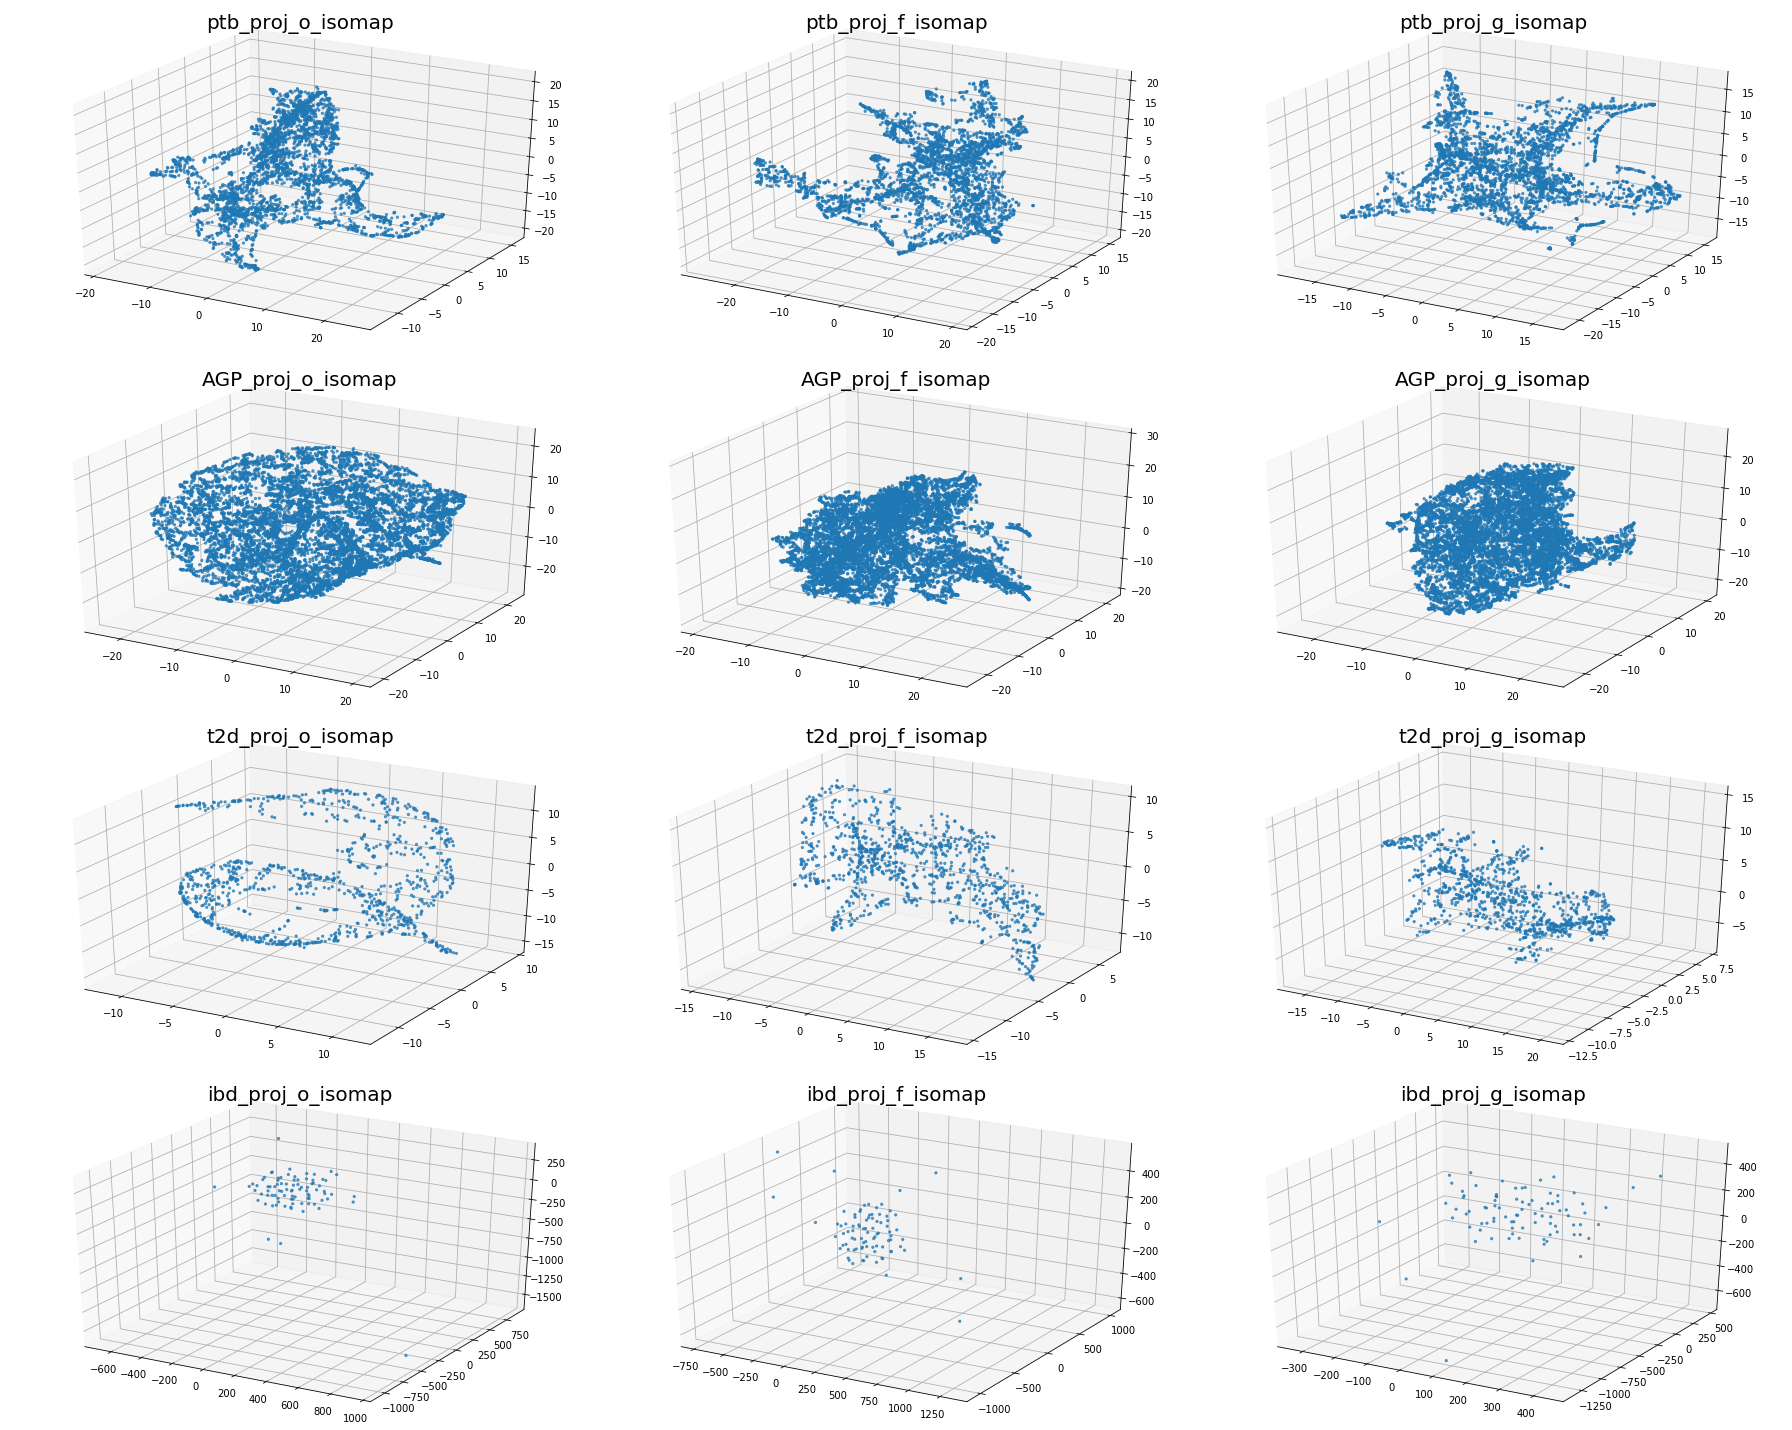

In [118]:
fig = plt.figure(figsize=(25,20))
for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'isomap'])
        embedding_ = tsne3d_results_isomap[label]
        
        ax = fig.add_subplot(4, 3, i*3+j+1, projection='3d')
        ax.scatter(embedding_[:,0], embedding_[:,1], embedding_[:,2], marker='.', alpha=0.7)
        ax.set_title(label, fontsize=20)
plt.tight_layout()
plt.show()

# TSNE3D LLE

In [115]:
# tsne3d_results_lle = {}
# for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
#     for j,tax_name in enumerate(['o', 'f', 'g']):
#         label = '_'.join([dataset_name, 'proj', tax_name, 'lle'])
#         path = label2path[label]
#         dataset = np.genfromtxt(path, delimiter=';')
#         tsne3 = TSNE(3)
#         tsne3.fit(dataset) 
#         tsne3d_results_lle[label] = tsne3.embedding_

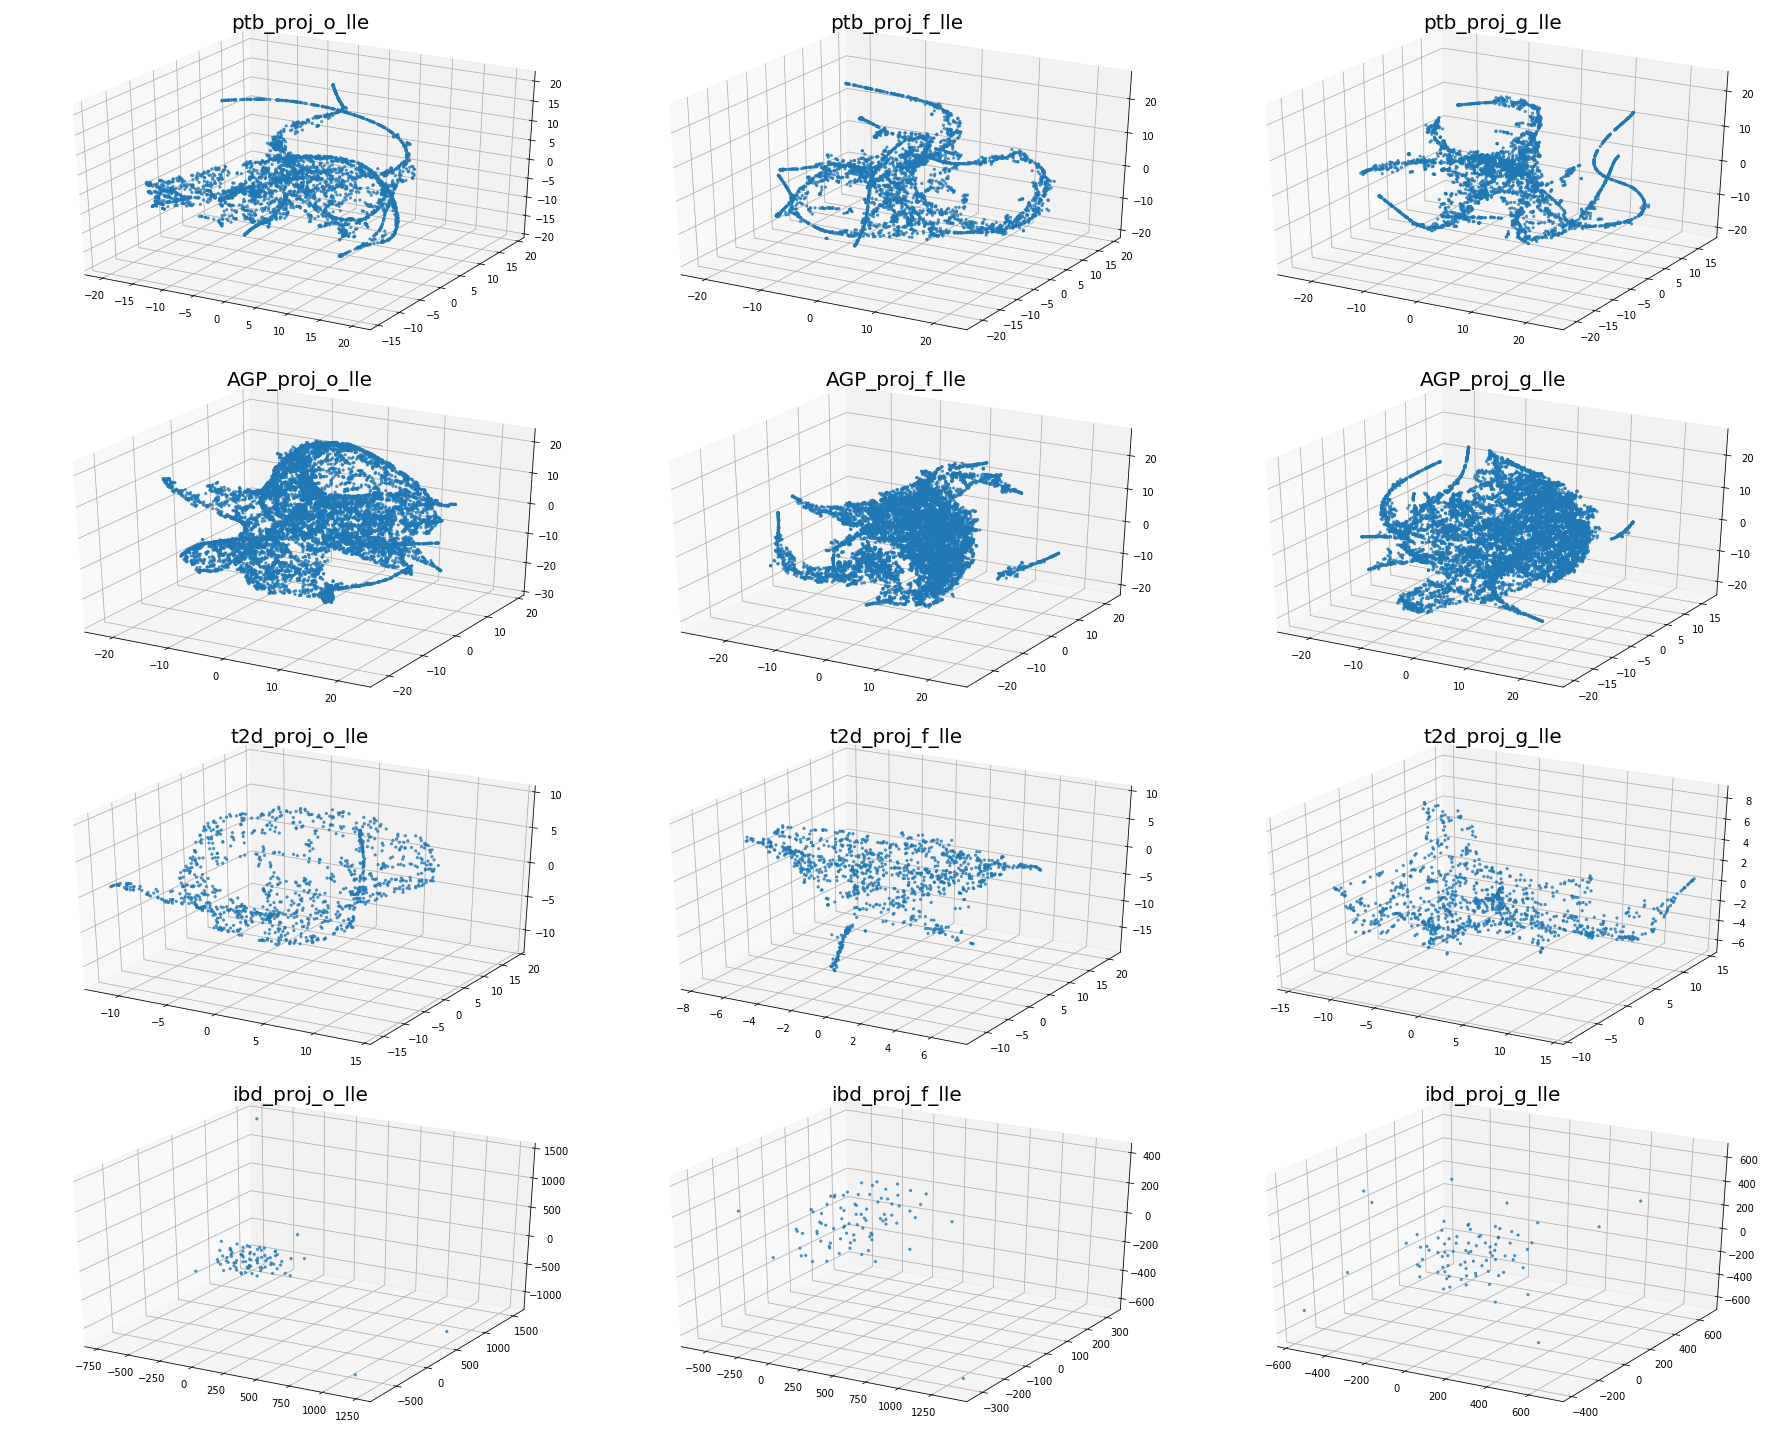

In [117]:
fig = plt.figure(figsize=(25,20))
for i,dataset_name in tqdm_notebook(enumerate(['ptb', 'AGP', 't2d', 'ibd'])):
    for j,tax_name in enumerate(['o', 'f', 'g']):
        label = '_'.join([dataset_name, 'proj', tax_name, 'lle'])
        embedding_ = tsne3d_results_lle[label]
        
        ax = fig.add_subplot(4, 3, i*3+j+1, projection='3d')
        ax.scatter(embedding_[:,0], embedding_[:,1], embedding_[:,2], marker='.', alpha=0.7)
        ax.set_title(label, fontsize=20)
plt.tight_layout()
plt.show()